In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import MonthLocator
import numpy as np

In [4]:
df_dim_date = pd.read_csv("dataset/dim_date.csv")
df_dim_districts = pd.read_csv("dataset/dim_districts.csv")
df_fact_stamps = pd.read_csv("dataset/fact_stamps.csv")
df_fact_transport = pd.read_csv("dataset/fact_transport.csv")
df_fact_TS_iPASS = pd.read_csv("dataset/fact_TS_iPASS.csv")


In [5]:
df_dim_date.head()

month  Mmm quarter  fiscal_year
0  2019-04-01  Apr      Q1         2019
1  2019-05-01  May      Q1         2019
2  2019-06-01  Jun      Q1         2019
3  2019-07-01  Jul      Q2         2019
4  2019-08-01  Aug      Q2         2019

In [6]:
df_dim_districts.head()

dist_code              district
0      19_1              Adilabad
1      22_2  Bhadradri Kothagudem
2      21_1           Hanumakonda
3      16_1             Hyderabad
4      20_2               Jagtial

In [7]:
df_fact_stamps.head()

dist_code       month  documents_registered_cnt  documents_registered_rev   
0      14_1  2019-04-01                      4533                  59236363  \
1      17_3  2019-04-01                      4151                  41508762   
2      20_3  2019-04-01                      2116                  23674170   
3      21_5  2019-04-01                      1089                  15915285   
4      23_1  2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

In [8]:
df_fact_transport.head()

dist_code       month  fuel_type_petrol  fuel_type_diesel   
0      15_1  2019-04-01             17910              3011  \
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle   
0                  76                22                    15308  \
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture   
0                   4429                          0                         4  \
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6   
0                 1278                16110                 4182  \
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles   
0                   717               19542                1477  \
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport  
0                   19856                1163  
1                    3203                 175  
2                    1648                 144  
3                    2075                 169  
4                    1701                 160

In [9]:
df_fact_TS_iPASS.head()

dist_code       month                              sector  investment in cr   
0      14_1  01-04-2019                         Engineering            2.3200  \
1      19_1  01-04-2019                         Engineering            0.6250   
2      20_3  01-04-2019                    Wood and Leather            0.2000   
3      20_3  01-04-2019                            Textiles            0.2675   
4      21_5  01-04-2019  Electrical and Electronic Products            0.1200   

   number_of_employees  
0                   15  
1                   13  
2                    8  
3                   27  
4                    5

In [10]:
merged_stamps_df = pd.merge(df_fact_stamps, df_dim_districts, on='dist_code', how='left')
merged_stamps_df.head()


dist_code       month  documents_registered_cnt  documents_registered_rev   
0      14_1  2019-04-01                      4533                  59236363  \
1      17_3  2019-04-01                      4151                  41508762   
2      20_3  2019-04-01                      2116                  23674170   
3      21_5  2019-04-01                      1089                  15915285   
4      23_1  2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  
0                     0                     0      Mahabubnagar  
1                     0                     0          Siddipet  
2                     0                     0  Rajanna Sircilla  
3                     0                     0       Mahabubabad  
4                     0                     0          Nalgonda

In [12]:
merged_transport_df = pd.merge(df_fact_transport, df_dim_districts, on='dist_code', how='left')
merged_transport_df.head()

dist_code       month  fuel_type_petrol  fuel_type_diesel   
0      15_1  2019-04-01             17910              3011  \
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle   
0                  76                22                    15308  \
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture   
0                   4429                          0                         4  \
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6   
0                 1278                16110                 4182  \
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles   
0                   717               19542                1477  \
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport                 district  
0                   19856                1163               Rangareddy  
1                    3203                 175                Kamareddy  
2                    1648                 144         Rajanna Sircilla  
3                    2075                 169                  Jangoan  
4                    1701                 160  Jayashankar Bhupalpally

In [14]:
merged_tsipass_df = pd.merge(df_fact_TS_iPASS, df_dim_districts, on='dist_code', how='left')
merged_tsipass_df.head()

dist_code       month                              sector  investment in cr   
0      14_1  01-04-2019                         Engineering            2.3200  \
1      19_1  01-04-2019                         Engineering            0.6250   
2      20_3  01-04-2019                    Wood and Leather            0.2000   
3      20_3  01-04-2019                            Textiles            0.2675   
4      21_5  01-04-2019  Electrical and Electronic Products            0.1200   

   number_of_employees          district  
0                   15      Mahabubnagar  
1                   13          Adilabad  
2                    8  Rajanna Sircilla  
3                   27  Rajanna Sircilla  
4                    5       Mahabubabad

In [ ]:
#checking for null values
merged_stamps_df.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
district                    0
dtype: int64

In [15]:
#checking for null values
merged_transport_df.isnull().sum()

dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
district                     0
dtype: int64

In [16]:
#checking for null values
merged_tsipass_df.isnull().sum()

dist_code              0
month                  0
sector                 0
investment in cr       0
number_of_employees    0
district               0
dtype: int64

## Question 1

In [13]:
import plotly.express as px

# Group by district and sum the revenue
district_revenue = merged_stamps_df.groupby('district')['documents_registered_rev'].sum().reset_index()

district_revenue = district_revenue.sort_values(by='documents_registered_rev', ascending=False)

# Plot the data
fig = px.bar(district_revenue, x='district', y='documents_registered_rev', 
             title="Revenue from Document Registration across Districts in Telangana",
             labels={'dist_code': 'District Code', 'documents_registered_rev': 'Revenue (in INR)'},
             color='documents_registered_rev',
             color_continuous_scale='Viridis')

fig.show()


In [20]:
# Extracting the year from the month column
merged_stamps_df['year'] = pd.to_datetime(merged_stamps_df['month']).dt.year

# Filtering the data for years 2019 and 2022
df_2019 = merged_stamps_df[merged_stamps_df['year'] == 2019].groupby('district')['documents_registered_rev'].sum()
df_2022 = merged_stamps_df[merged_stamps_df['year'] == 2022].groupby('district')['documents_registered_rev'].sum()


In [21]:
# Calculating absolute revenue growth for each district
revenue_growth = df_2022 - df_2019

# Selecting the top 5 districts based on revenue growth
top_5_revenue_growth = revenue_growth.sort_values(ascending=False).head(5)
top_5_revenue_growth


district
Rangareddy            21856504820
Medchal_Malkajgiri    14657334773
Hyderabad              7597480807
Sangareddy             4755973194
Hanumakonda            1609998413
Name: documents_registered_rev, dtype: int64

In [36]:
# Plotting the data using Plotly
fig = px.bar(top_5_revenue_growth.reset_index(),
             x='documents_registered_rev',
             y='district',
             orientation='h',
             title="Top 5 Districts with Highest Revenue Growth between FY 2019 and FY 2022",
             labels={'district': 'District', 'documents_registered_rev': 'Revenue Growth (in INR)'},
             color='documents_registered_rev',
             color_continuous_scale='Viridis',
             text_auto='.2s')

#invert the y axis to show top value at the top
fig.update_yaxes(autorange="reversed")

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()


## Question 2

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\2731949738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_revenue = merged_stamps_df.groupby('district').sum()


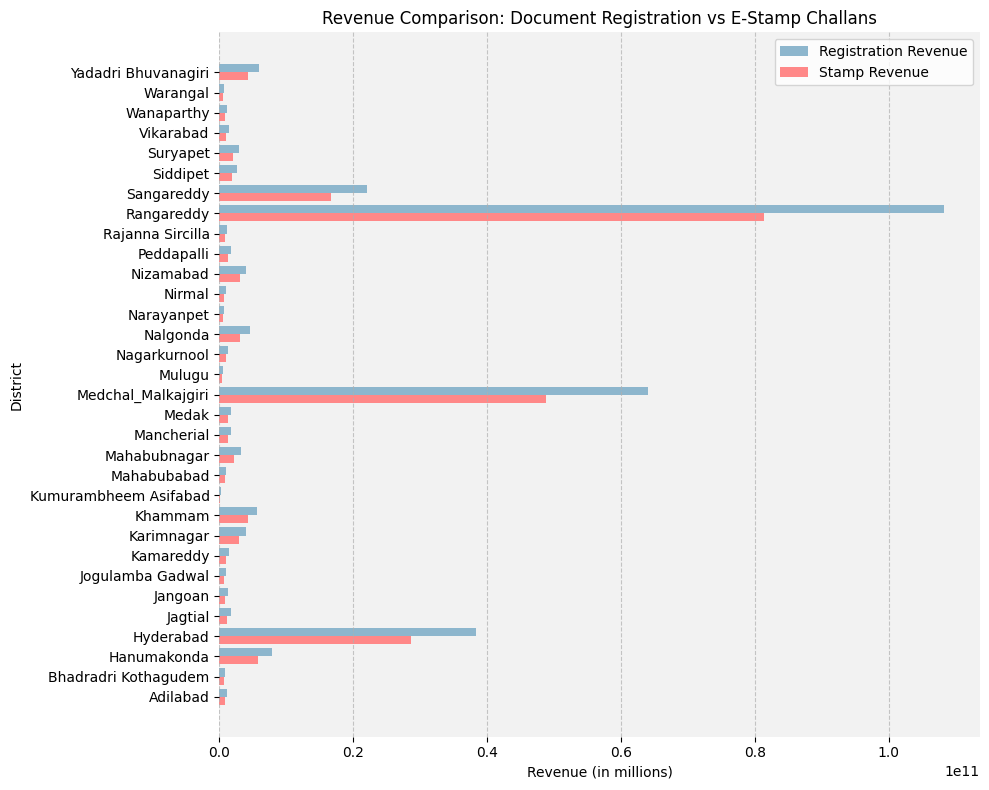

In [9]:
district_revenue = merged_stamps_df.groupby('district').sum()

bar_positions = np.arange(len(district_revenue))
bar_height = 0.4

# Define pastel colors
pastel_blue = '#8DB6CD'
pastel_red = '#FF8888'

fig, ax = plt.subplots(figsize=(10, 8))
registration_bars = ax.barh(bar_positions, district_revenue['documents_registered_rev'], bar_height, label='Registration Revenue', color=pastel_blue)
stamp_bars = ax.barh(bar_positions - bar_height, district_revenue['estamps_challans_rev'], bar_height, label='Stamp Revenue', color=pastel_red)

ax.set_title('Revenue Comparison: Document Registration vs E-Stamp Challans')
ax.set_xlabel('Revenue (in millions)')
ax.set_ylabel('District')
ax.set_yticks(bar_positions - bar_height/2)
ax.set_yticklabels(district_revenue.index, fontsize=10)
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Adding a background color to the plot
ax.set_facecolor('#f2f2f2')

# Adding a border around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()



In [10]:
merged_stamps_df = pd.merge(merged_stamps_df, df_dim_date, on='month', how='left')
merged_stamps_df

dist_code       month  documents_registered_cnt  \
0         14_1  2019-04-01                      4533   
1         17_3  2019-04-01                      4151   
2         20_3  2019-04-01                      2116   
3         21_5  2019-04-01                      1089   
4         23_1  2019-04-01                      6133   
...        ...         ...                       ...   
1499      20_4  2023-03-01                      1510   
1500      14_5  2023-03-01                       980   
1501      21_1  2023-03-01                      4321   
1502      22_2  2023-03-01                      1255   
1503      23_1  2023-03-01                      5806   

      documents_registered_rev  estamps_challans_cnt  estamps_challans_rev  \
0                     59236363                     0                     0   
1                     41508762                     0                     0   
2                     23674170                     0                     0   
3                     15915285                     0                     0   
4                     82593256                     0                     0   
...                        ...                   ...                   ...   
1499                  54036552                  1596              57171081   
1500                  23898383                  1026              23106330   
1501                 279791569                  4642             284765300   
1502                  18695648                  1566              22453502   
1503                 132022152                  5997             135318190   

                  district  Mmm quarter  fiscal_year  
0             Mahabubnagar  Apr      Q1         2019  
1                 Siddipet  Apr      Q1         2019  
2         Rajanna Sircilla  Apr      Q1         2019  
3              Mahabubabad  Apr      Q1         2019  
4                 Nalgonda  Apr      Q1         2019  
...                    ...  ...     ...          ...  
1499            Peddapalli  Mar      Q4         2022  
1500            Narayanpet  Mar      Q4         2022  
1501           Hanumakonda  Mar      Q4         2022  
1502  Bhadradri Kothagudem  Mar      Q4         2022  
1503              Nalgonda  Mar      Q4         2022  

[1504 rows x 10 columns]

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3898512264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fy_2022_stamps_df['contribution_ratio'] = fy_2022_stamps_df['estamps_challans_rev'] / fy_2022_stamps_df['documents_registered_rev']


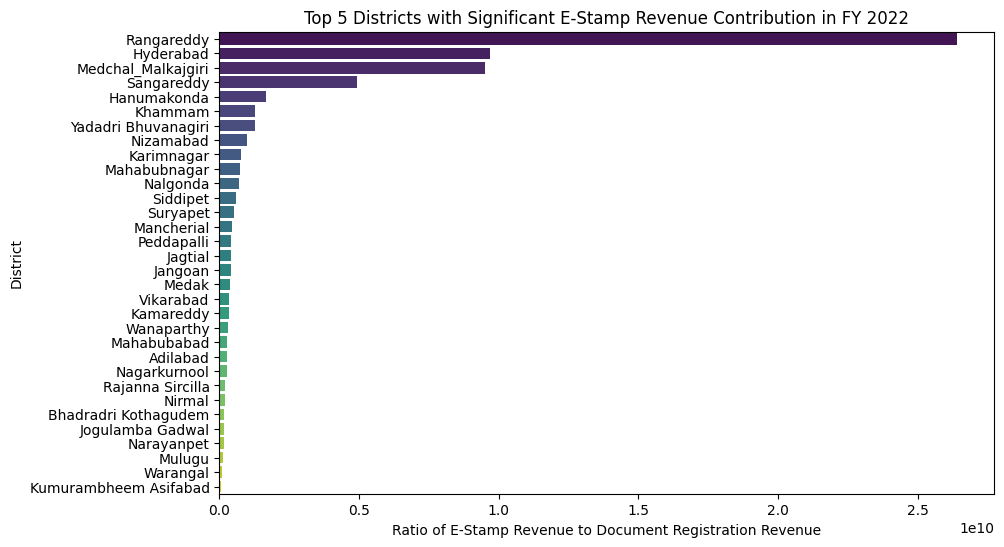

In [11]:
fy_2022_stamps_df = merged_stamps_df[merged_stamps_df['fiscal_year'] == 2022]
fy_2022_stamps_df['contribution_ratio'] = fy_2022_stamps_df['estamps_challans_rev'] / fy_2022_stamps_df['documents_registered_rev']
threshold = 1 # Adjust this threshold as needed
significant_districts = fy_2022_stamps_df[fy_2022_stamps_df['contribution_ratio'] > threshold]

grouped_districts = significant_districts.groupby('district').agg({
    'estamps_challans_rev': 'sum',
    'documents_registered_rev': 'sum'
}).reset_index()
top_districts = grouped_districts.sort_values('estamps_challans_rev', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='estamps_challans_rev', y='district', data=top_districts, palette='viridis')
plt.xlabel('Ratio of E-Stamp Revenue to Document Registration Revenue')
plt.ylabel('District')
plt.title('Top 5 Districts with Significant E-Stamp Revenue Contribution in FY 2022')
plt.show()


In [39]:
df_2022 = merged_stamps_df[merged_stamps_df['year'] == 2022]

# Aggregate the revenues for FY 2022 by district
district_revenue_2022 = df_2022.groupby('district').agg({
    'documents_registered_rev': 'sum',
    'estamps_challans_rev': 'sum'
}).reset_index()

# Calculate the difference between e-stamps revenue and document registration revenue
district_revenue_2022['revenue_difference'] = district_revenue_2022['estamps_challans_rev'] - district_revenue_2022['documents_registered_rev']

# Sort by the difference and select top 5 districts where e-stamps revenue is significantly higher
top_5_difference = district_revenue_2022.sort_values(by='revenue_difference', ascending=False).head(5)
top_5_difference

district  documents_registered_rev  estamps_challans_rev   
24          Rangareddy               39465527338           39955444951  \
15  Medchal_Malkajgiri               24264692242           24394118384   
3            Hyderabad               13860437338           13959081475   
25          Sangareddy                8279206192            8371737803   
19          Narayanpet                 222369632             259643466   

    revenue_difference  
24           489917613  
15           129426142  
3             98644137  
25            92531611  
19            37273834

In [42]:
# Plotting the data using Plotly
fig = px.bar(top_5_difference,
             x='revenue_difference',
             y='district',
             orientation='h',
             title="Top 5 Districts where E-Stamps Revenue is Significantly Higher than Document Registration in FY 2022",
             labels={'district': 'District', 'revenue_difference': 'Revenue Difference (in INR)'},
             color='revenue_difference',
             color_continuous_scale='Viridis',
             text_auto='.2s')

fig.update_yaxes(autorange="reversed")

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()


## Question 3

In [43]:
# Identify the first month when e-Stamp challan revenue is greater than 0
first_month_e_stamp = merged_stamps_df[merged_stamps_df['estamps_challans_rev'] > 0]['month'].min()
first_month_e_stamp


'2020-12-01'

In [44]:
# Grouping the data by month and summing the revenues for both sources
monthly_revenue = merged_stamps_df.groupby('month').agg({
    'documents_registered_rev': 'sum',
    'estamps_challans_rev': 'sum'
}).reset_index()

In [46]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add line traces for both revenue sources
fig.add_trace(go.Scatter(x=monthly_revenue['month'], y=monthly_revenue['documents_registered_rev'],
                    mode='lines', name='Document Revenue'))
fig.add_trace(go.Scatter(x=monthly_revenue['month'], y=monthly_revenue['estamps_challans_rev'],
                    mode='lines', name='E-Stamp Revenue'))

# Add a vertical line for e-Stamp Implementation
fig.add_shape(type="line", x0=first_month_e_stamp, x1=first_month_e_stamp, 
              y0=0, y1=monthly_revenue['documents_registered_rev'].max(),
              line=dict(color="Green", width=2, dash="dashdot"),
              name='E-Stamp Implementation')

# Update layout for better visualization
fig.update_layout(title='Monthly Revenue Trends of Document Registration and E-Stamp Challan',
                  xaxis_title='Month', yaxis_title='Revenue (in INR)',
                  xaxis=dict(showgrid=True, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2),
                  yaxis=dict(showgrid=True, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2),
                  autosize=False, hovermode='closest')

fig.show()


In [48]:
# Grouping the data by month and summing the revenues for both sources
monthly_revenue = merged_stamps_df.groupby('month').agg({
    'documents_registered_cnt': 'sum',
    'estamps_challans_cnt': 'sum'
}).reset_index()

In [51]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add line traces for both revenue sources
fig.add_trace(go.Scatter(x=monthly_revenue['month'], y=monthly_revenue['documents_registered_cnt'],
                    mode='lines', name='Document Count'))
fig.add_trace(go.Scatter(x=monthly_revenue['month'], y=monthly_revenue['estamps_challans_cnt'],
                    mode='lines', name='E-Stamp Count'))

# Add a vertical line for e-Stamp Implementation
fig.add_shape(type="line", x0=first_month_e_stamp, x1=first_month_e_stamp, 
              y0=0, y1=monthly_revenue['documents_registered_cnt'].max(),
              line=dict(color="Green", width=2, dash="dashdot"),
              name='E-Stamp Implementation')

# Update layout for better visualization
fig.update_layout(title='Monthly Count Trends of Document Registration and E-Stamp Challan',
                  xaxis_title='Month', yaxis_title='Count',
                  xaxis=dict(showgrid=True, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2),
                  yaxis=dict(showgrid=True, showline=True, linecolor='rgb(204, 204, 204)', linewidth=2),
                  autosize=False, hovermode='closest')

fig.show()


## Question 4

In [15]:
revenue_by_district = merged_stamps_df.groupby('district')['estamps_challans_rev'].sum()

# Define quantiles to categorize districts into segments
quantiles = revenue_by_district.quantile([0, 0.33, 0.66, 1])

# Function to assign segment labels
def assign_segment(revenue):
    if revenue <= quantiles[0.33]:
        return 'Low Revenue'
    elif revenue <= quantiles[0.66]:
        return 'Medium Revenue'
    else:
        return 'High Revenue'

# Assign segment labels to each district
merged_stamps_df['revenue_segment'] = merged_stamps_df['district'].map(revenue_by_district.apply(assign_segment))

# Print the DataFrame with assigned segments
merged_stamps_df.head()


dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year revenue_segment  
0         2019    High Revenue  
1         2019  Medium Revenue  
2         2019     Low Revenue  
3         2019     Low Revenue  
4         2019    High Revenue

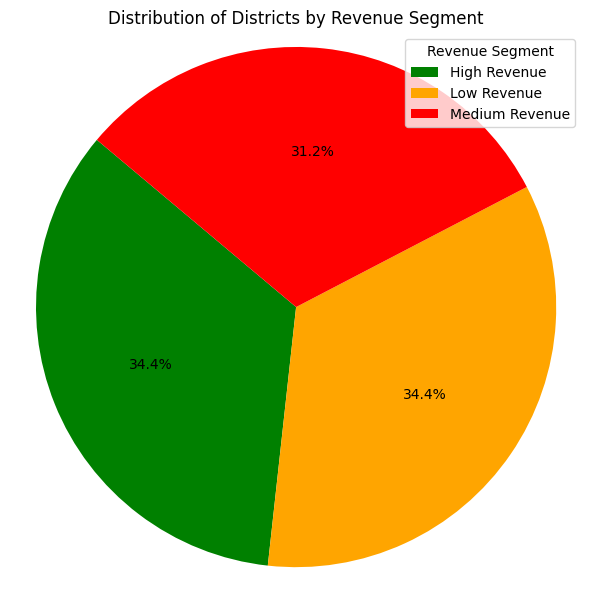

In [16]:

segment_counts = merged_stamps_df['revenue_segment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ['green', 'orange', 'red']
plt.pie(segment_counts, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Districts by Revenue Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Revenue Segment", labels=segment_counts.index, loc="upper right")
 
plt.tight_layout(pad=1.0)
plt.show()


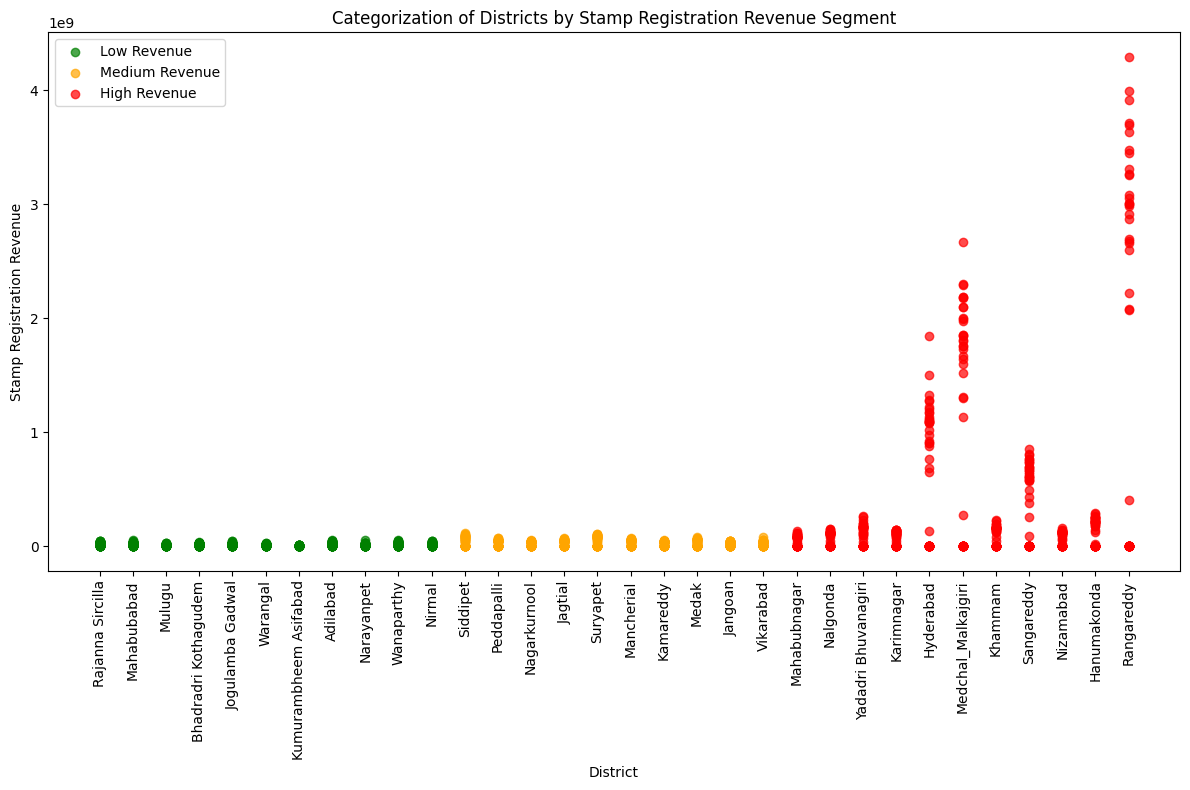

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'merged_stamps_df' with columns 'district', 'revenue_segment', and 'estamps_challans_rev'

# Set up a color palette for the segments
segment_colors = {'Low Revenue': 'green', 'Medium Revenue': 'orange', 'High Revenue': 'red'}

# Create a scatter plot with color-coded segments
plt.figure(figsize=(12, 8))

# Iterate through each segment and plot points with the corresponding color
for segment, color in segment_colors.items():
    segment_df = merged_stamps_df[merged_stamps_df['revenue_segment'] == segment]
    plt.scatter(segment_df['district'], segment_df['estamps_challans_rev'], color=color, label=segment, alpha=0.7)

plt.title('Categorization of Districts by Stamp Registration Revenue Segment')
plt.xlabel('District')
plt.ylabel('Stamp Registration Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


In [18]:
import geopandas as gpd
import folium

# Load GeoJSON data using GeoPandas
json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

# Set the CRS for the GeoDataFrame (replace 'EPSG:4326' with the correct CRS code)
gdf.crs = 'EPSG:4326'  # For example, using WGS84

# Reproject the GeoDataFrame if needed (replace 'EPSG:3857' with your desired CRS)
# gdf = gdf.to_crs('EPSG:3857')

# Create a Folium map centered around the data
center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add GeoJSON data to the map
folium.GeoJson(gdf).add_to(m)

# Save the map as an HTML file
output_map_path = 'output_map.html'
m.save(output_map_path)

# Display the map (if using a Jupyter Notebook)
display(m)



C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\1797910697.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\1797910697.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()


In [19]:
import folium
import geopandas as gpd

json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

gdf.crs = 'EPSG:4326'

district_segment_mapping = dict(zip(merged_stamps_df['district'], merged_stamps_df['revenue_segment']))

def style_function(feature):
    segment = district_segment_mapping.get(feature['properties']['New_Distri'])
    return {
        'fillOpacity': 0.6,
        'fillColor': 'green' if segment == 'Low Revenue' else 'orange' if segment == 'Medium Revenue' else 'red',
        'color': 'black',
        'weight': 1.5,
        'dashArray': '5, 5',
    }

center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles=None)

tooltip = folium.GeoJsonTooltip(fields=['New_Distri'])

folium.GeoJson(gdf, style_function=style_function, tooltip=tooltip).add_to(m)

for index, row in gdf.iterrows():
    district_name = row['New_Distri']
    district_center = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    # Create a custom icon to display district name as text
    icon = folium.DivIcon(html=f'<div style="font-size: 15px;">{district_name}</div>')
    folium.Marker(location=district_center, icon=icon).add_to(m)

legend_html = '''
    <style>
        .map-legend {
            position: absolute;
            bottom: 20px;
            left: 50px;
            width: 220px;
            padding: 6px;
            background-color: rgba(255, 255, 255, 0.8);
            border-radius: 4px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
        }
    </style>
    <div class="map-legend">
        <p>Legend:</p>
        <p><span class="low-revenue">Low Revenue</span></p>
        <p><span class="medium-revenue">Medium Revenue</span></p>
        <p><span class="high-revenue">High Revenue</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

colormap_html = '''
    <div style="position: absolute; bottom: 40px; left: 50px; width: 220px; padding: 6px; background-color: rgba(255, 255, 255, 0.8); border-radius: 4px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
        <p>Map Labels:</p>
        <p><span style="color: black;">District Labels</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(colormap_html))

output_map_path = 'temp_map.html'
m.save(output_map_path)

display(m)


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\1311725497.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\1311725497.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()


# Question 7

In [17]:
# Correctly filter the data for FY 2021 and FY 2022
data_fy_2021 = merged_transport_df[merged_transport_df['month'].between("2020-04-01", "2021-03-31")]
data_fy_2022 = merged_transport_df[merged_transport_df['month'].between("2021-04-01", "2022-03-31")]

# Sum the sales for each district and category for FY 2021 and FY 2022
sales_fy_2021 = data_fy_2021.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum()
sales_fy_2022 = data_fy_2022.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum()

sales_fy_2021.head(), sales_fy_2022.head()


(                      fuel_type_petrol  fuel_type_diesel  fuel_type_electric
 district                                                                    
 Adilabad                         20132              2807                  34
 Bhadradri Kothagudem             34628              6774                  22
 Hyderabad                       213154             15778                1625
 Jagtial                          35201              4689                  84
 Jangoan                          16591              4479                   8,
                       fuel_type_petrol  fuel_type_diesel  fuel_type_electric
 district                                                                    
 Adilabad                         16592              2267                 277
 Bhadradri Kothagudem             27650              5739                  76
 Hyderabad                       228817             21195                8929
 Jagtial                          24945              2872      

In [57]:
# Calculate the growth rate for each district and category
growth_rate = (sales_fy_2022 - sales_fy_2021)

# Identify the top 3 and bottom 3 districts based on growth rate for each category
top_3_petrol = growth_rate['fuel_type_petrol'].nlargest(3)
bottom_3_petrol = growth_rate['fuel_type_petrol'].nsmallest(3)

top_3_diesel = growth_rate['fuel_type_diesel'].nlargest(3)
bottom_3_diesel = growth_rate['fuel_type_diesel'].nsmallest(3)

top_3_electric = growth_rate['fuel_type_electric'].nlargest(3)
bottom_3_electric = growth_rate['fuel_type_electric'].nsmallest(3)

top_3_petrol, bottom_3_petrol, top_3_diesel, bottom_3_diesel, top_3_electric, bottom_3_electric


(district
 Hyderabad             15663
 Rangareddy            12598
 Medchal_Malkajgiri     1728
 Name: fuel_type_petrol, dtype: int64,
 district
 Warangal    -26713
 Nizamabad   -12122
 Jagtial     -10256
 Name: fuel_type_petrol, dtype: int64,
 district
 Rangareddy            6770
 Medchal_Malkajgiri    5874
 Hyderabad             5417
 Name: fuel_type_diesel, dtype: int64,
 district
 Nalgonda    -4196
 Warangal    -3951
 Nizamabad   -2621
 Name: fuel_type_diesel, dtype: int64,
 district
 Hyderabad             7304
 Medchal_Malkajgiri    5830
 Rangareddy            4796
 Name: fuel_type_electric, dtype: int64,
 district
 Mahabubabad              24
 Jogulamba Gadwal         29
 Kumurambheem Asifabad    30
 Name: fuel_type_electric, dtype: int64)

In [70]:
# Adjusting the styling and re-creating the bar chart

# Create horizontal bar chart
fig = go.Figure()

# Petrol category
fig.add_trace(go.Bar(
    y=top_3_petrol.index,
    x=top_3_petrol.values,
    name='Top 3 - Petrol',
    orientation='h',
    marker=dict(color='blue')
))


# Update layout
fig.update_layout(
    title="Top 3 Districts by Vehicle Sales Growth Petrol",
    xaxis_title="Growth Number",
    yaxis_title="District",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.update_yaxes(autorange="reversed")

fig.show()


In [64]:
# Adjusting the styling and re-creating the bar chart

# Create horizontal bar chart
fig = go.Figure()


fig.add_trace(go.Bar(
    y=bottom_3_petrol.index,
    x=bottom_3_petrol.values,
    name='Bottom 3 - Petrol',
    orientation='h',
    marker=dict(color='lightblue')
))

# Update layout
fig.update_layout(
    title="Bottom 3 Districts by Vehicle Sales Growth Petrol",
    xaxis_title="Growth Number",
    yaxis_title="District",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.update_yaxes(autorange="reversed")

fig.show()


In [65]:
# Adjusting the styling and re-creating the bar chart

# Create horizontal bar chart
fig = go.Figure()

# Diesel category
fig.add_trace(go.Bar(
    y=top_3_diesel.index,
    x=top_3_diesel.values,
    name='Top 3 - Diesel',
    orientation='h',
    marker=dict(color='green')
))



# Update layout
fig.update_layout(
    title="Top 3 Districts by Vehicle Sales Growth Petrol",
    xaxis_title="Growth Number",
    yaxis_title="District",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.update_yaxes(autorange="reversed")

fig.show()


In [66]:
# Adjusting the styling and re-creating the bar chart

# Create horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=bottom_3_diesel.index,
    x=bottom_3_diesel.values,
    name='Bottom 3 - Diesel',
    orientation='h',
    marker=dict(color='lightgreen')
))

# Update layout
fig.update_layout(
    title="Top 3 Districts by Vehicle Sales Growth Petrol",
    xaxis_title="Growth Rate (%)",
    yaxis_title="District",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.update_yaxes(autorange="reversed")

fig.show()


In [67]:
# Adjusting the styling and re-creating the bar chart

# Create horizontal bar chart
fig = go.Figure()

# Electric category
fig.add_trace(go.Bar(
    y=top_3_electric.index,
    x=top_3_electric.values,
    name='Top 3 - Electric',
    orientation='h',
    marker=dict(color='red')
))
# Update layout
fig.update_layout(
    title="Top 3 Districts by Vehicle Sales Growth Petrol",
    xaxis_title="Growth Rate (%)",
    yaxis_title="District",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.update_yaxes(autorange="reversed")

fig.show()


In [68]:
# Adjusting the styling and re-creating the bar chart

# Create horizontal bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=bottom_3_electric.index,
    x=bottom_3_electric.values,
    name='Bottom 3 - Electric',
    orientation='h',
    marker=dict(color='pink')
))

# Update layout
fig.update_layout(
    title="Top 3 Districts by Vehicle Sales Growth Petrol",
    xaxis_title="Growth Rate (%)",
    yaxis_title="District",
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.update_yaxes(autorange="reversed")

fig.show()


## Question 6

In [20]:
merged_transport_df = pd.merge(df_fact_transport, df_dim_districts, on='dist_code', how='left')
merged_transport_df.head()


dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport                 district  
0                   19856                1163               Rangareddy  
1                    3203                 175                Kamareddy  
2                    1648                 144         Rajanna Sircilla  
3                    2075                 169                  Jangoan  
4                    1701                 160  Jayashankar Bhupalpally

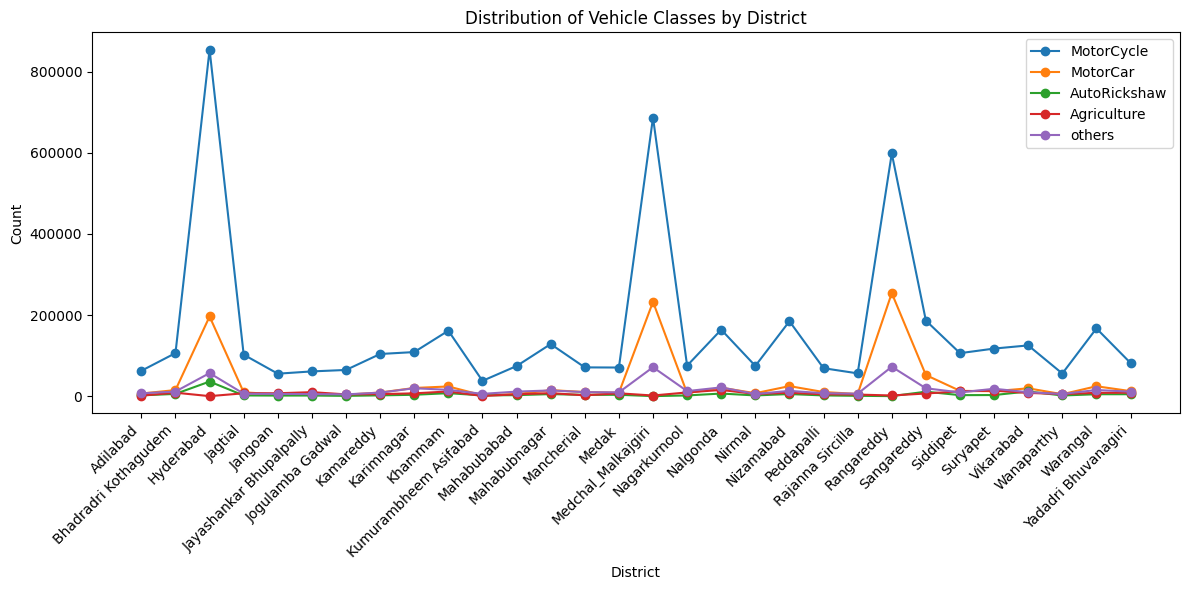

In [21]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
vehicle_classes = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']

total_class_df = merged_transport_df.groupby('district')[vehicle_classes].sum()

# Create a figure for line plots
plt.figure(figsize=(12, 6))
plt.title('Distribution of Vehicle Classes by District')

# Plot a line for each vehicle class with different colors
for vehicle_class, color in zip(total_class_df.columns, colors):
    plt.plot(total_class_df.index, total_class_df[vehicle_class], marker='o', color=color, label=vehicle_class[13:])

plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the line plot
plt.show()

In [22]:
merged_transport_df['TotalVehicles'] = merged_transport_df[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']].sum(axis=1)
# for vehicle_class in vehicle_classes:
#     merged_transport_df[vehicle_class] = merged_transport_df[vehicle_class] / merged_transport_df['TotalVehicles']
merged_transport_df.head()

dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport                 district  \
0                   19856                1163               Rangareddy   
1                    3203                 175                Kamareddy   
2                    1648                 144         Rajanna Sircilla   
3                    2075                 169                  Jangoan   
4                    1701                 160  Jayashankar Bhupalpally   

   TotalVehicles  
0          21019  
1           3378  
2           1792  
3           2244  
4           1861

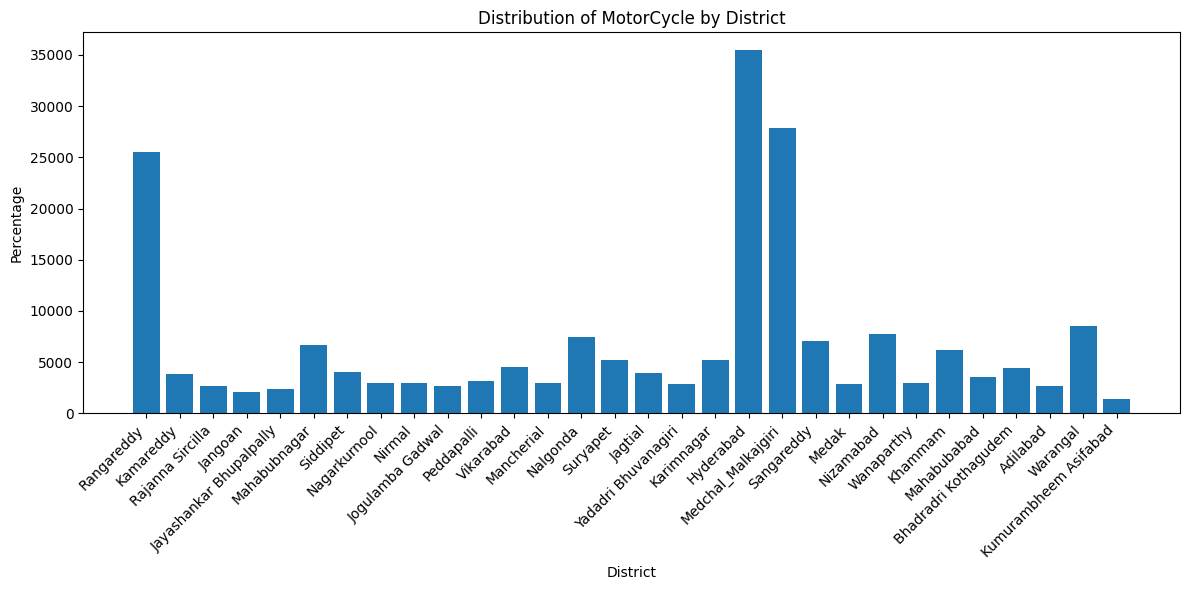

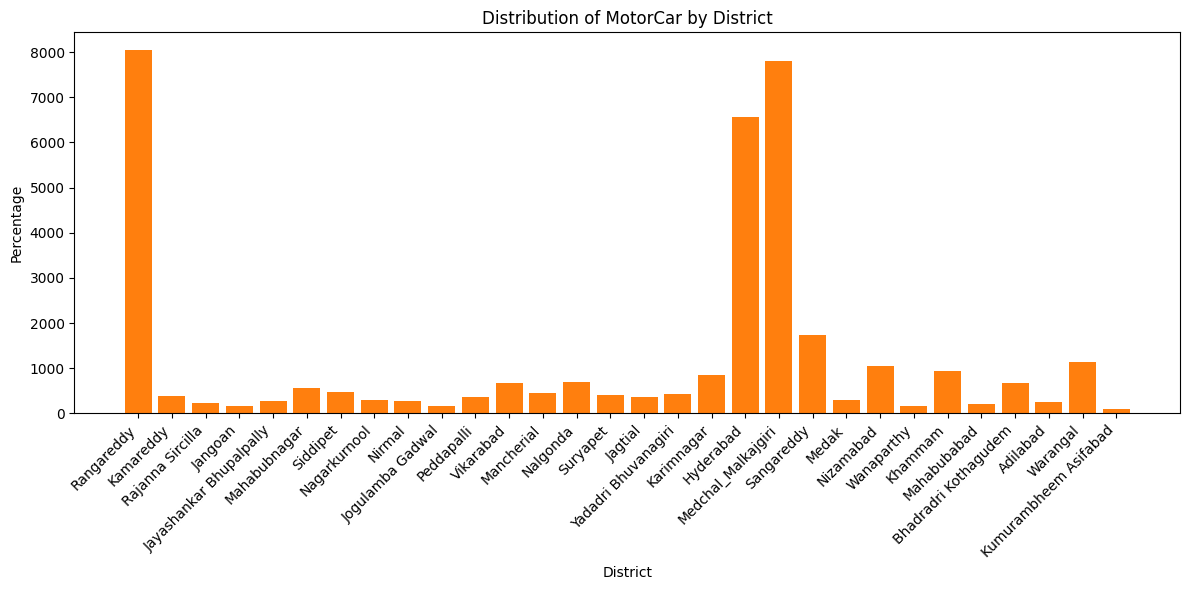

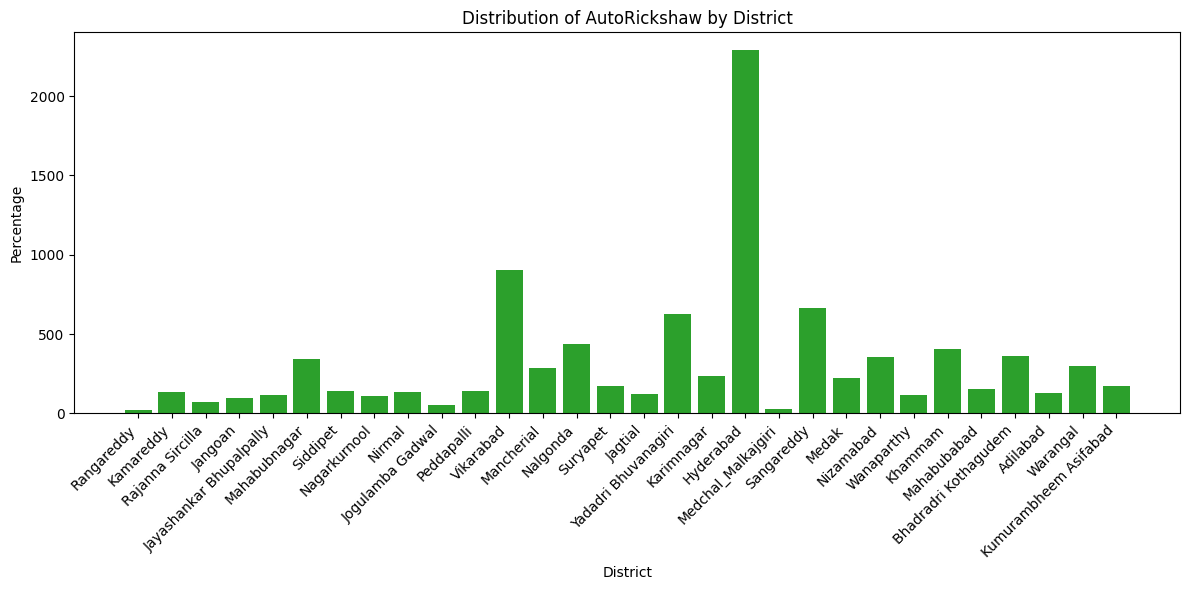

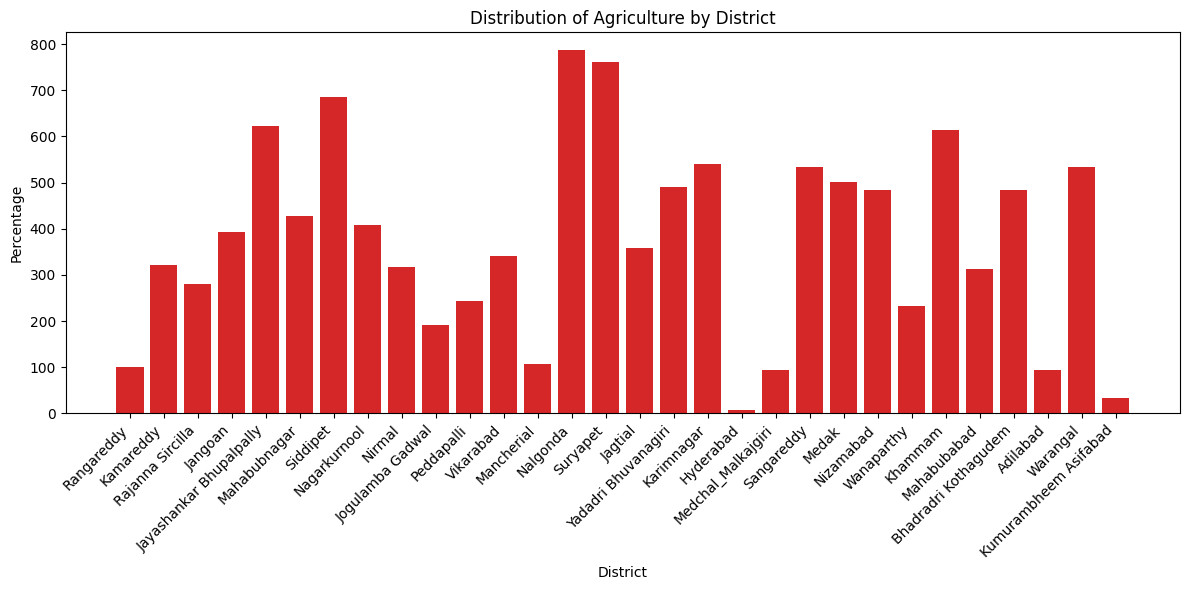

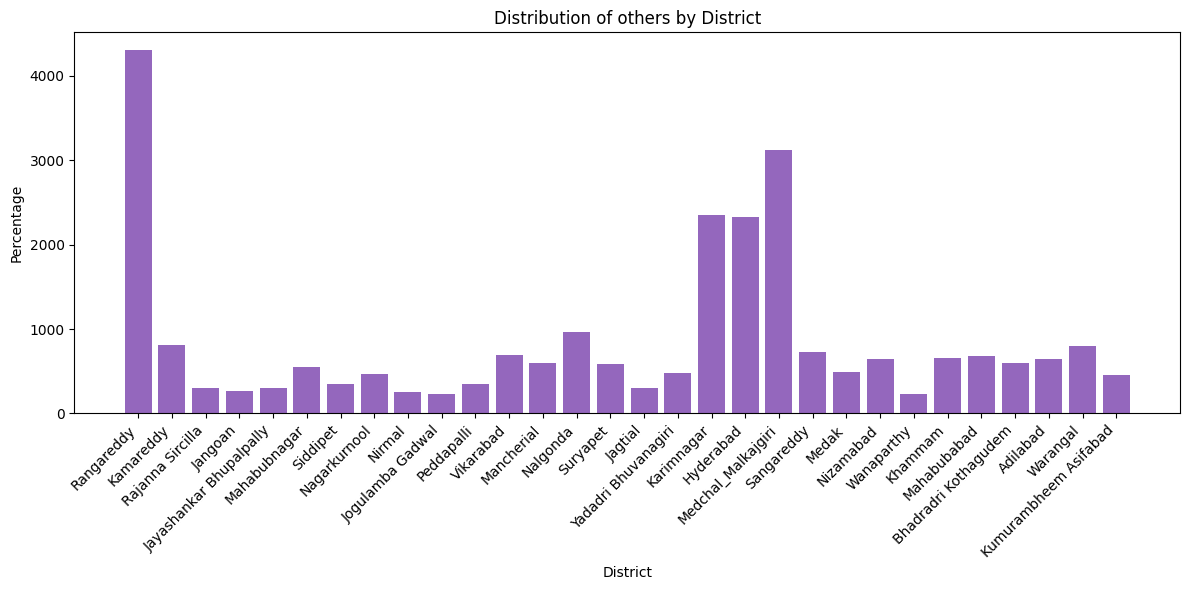

In [23]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot individual plots for each vehicle class with different colors
for vehicle_class, color in zip(vehicle_classes, colors):
    plt.figure(figsize=(12, 6))
    plt.bar(merged_transport_df['district'], merged_transport_df[vehicle_class], color=color)
    plt.xlabel('District')
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {vehicle_class[13:]} by District')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [35]:
# Filter the data for FY 2022
data_2022 = merged_transport_df[merged_transport_df['month'].between('2022-04-01', '2023-03-31')]

# Group by district and sum the values for each vehicle class
vehicle_distribution_by_district = data_2022.groupby('district').agg({
    'vehicleClass_MotorCycle': 'sum',
    'vehicleClass_MotorCar': 'sum',
    'vehicleClass_AutoRickshaw': 'sum',
    'vehicleClass_Agriculture': 'sum'
}).reset_index()

# Identify the predominant vehicle class for each district
vehicle_distribution_by_district['predominant_vehicle'] = vehicle_distribution_by_district.iloc[:, 1:].idxmax(axis=1)

vehicle_distribution_by_district = vehicle_distribution_by_district.sort_values(by='vehicleClass_MotorCycle', ascending=False)

vehicle_distribution_by_district.head()


district  vehicleClass_MotorCycle  vehicleClass_MotorCar   
2            Hyderabad                   206819                  51447  \
15  Medchal_Malkajgiri                   164626                  61071   
22          Rangareddy                   154186                  71832   
23          Sangareddy                    40784                  14565   
19           Nizamabad                    28105                   5824   

    vehicleClass_AutoRickshaw  vehicleClass_Agriculture   
2                        8397                        20  \
15                         83                       261   
22                         69                       449   
23                       3381                      1570   
19                       1011                      1181   

        predominant_vehicle  
2   vehicleClass_MotorCycle  
15  vehicleClass_MotorCycle  
22  vehicleClass_MotorCycle  
23  vehicleClass_MotorCycle  
19  vehicleClass_MotorCycle

In [36]:
import plotly.graph_objects as go

# Data for the plot
districts = vehicle_distribution_by_district['district']
motorcycles = vehicle_distribution_by_district['vehicleClass_MotorCycle']
motorcars = vehicle_distribution_by_district['vehicleClass_MotorCar']
autorickshaws = vehicle_distribution_by_district['vehicleClass_AutoRickshaw']
agriculture = vehicle_distribution_by_district['vehicleClass_Agriculture']

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='MotorCycle', x=districts, y=motorcycles),
    go.Bar(name='MotorCar', x=districts, y=motorcars),
    go.Bar(name='AutoRickshaw', x=districts, y=autorickshaws),
    go.Bar(name='Agriculture', x=districts, y=agriculture)
])

# Change the bar mode and layout details
fig.update_layout(
    barmode='stack',
    title="Distribution of Vehicles by Vehicle Class across Districts for FY 2022",
    xaxis_title="Districts",
    yaxis_title="Count of Vehicles",
    legend_title="Vehicle Class"
)

# Show the plot
fig.show()


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\2042109164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = merged_transport_df.groupby('district').sum()


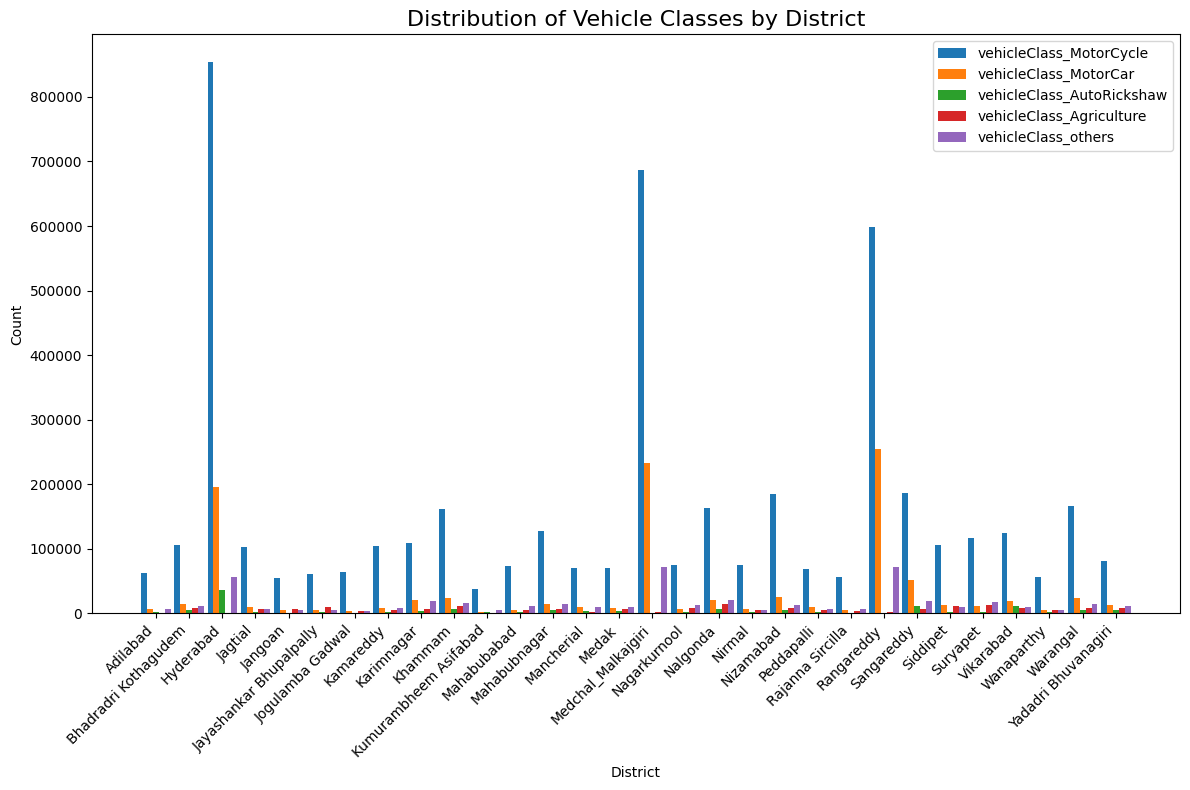

In [24]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
grouped_data = merged_transport_df.groupby('district').sum()

# Create a figure with subplots
# Create positions for bars
bar_width = 0.18
positions = np.arange(len(grouped_data.index))

# Create a figure
plt.figure(figsize=(12, 8))
plt.title('Distribution of Vehicle Classes by District', fontsize=16)

# Plot bars for each vehicle class
for idx, (vehicle_class, color) in enumerate(zip(vehicle_classes, colors)):
    plt.bar(positions + (idx * bar_width), grouped_data[vehicle_class], bar_width, color=color, label=vehicle_class)

# Set labels, ticks, and legend
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(positions + bar_width * 2, grouped_data.index, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Question 8 

In [72]:
# Convert the 'month' column to datetime format
df_fact_TS_iPASS['month'] = pd.to_datetime(df_fact_TS_iPASS['month'], format='%d-%m-%Y')

# Filter for data from FY 2022
fy_2022_data = df_fact_TS_iPASS[(df_fact_TS_iPASS['month'] >= '2021-04-01') & (df_fact_TS_iPASS['month'] <= '2022-03-31')]

# Group by 'sector' and sum the investments
sector_investments_2022 = fy_2022_data.groupby('sector')['investment in cr'].sum()

# Sort the sectors by investment in descending order and take the top 5
top_5_sectors_2022 = sector_investments_2022.sort_values(ascending=False).head(5)
top_5_sectors_2022


sector
Pharmaceuticals and Chemicals                    6860.9321
Plastic and Rubber                               2059.6245
Real Estate,Industrial Parks and IT Buildings    2015.2619
Beverages                                        1843.6802
Food Processing                                   999.3621
Name: investment in cr, dtype: float64

In [74]:
import plotly.graph_objects as go

# Plotting the horizontal bar graph using Plotly
fig = px.bar(
    x=top_5_sectors_2022.values,
    y=top_5_sectors_2022.index,
    orientation='h',
    text_auto='.2s'
)

# Set the layout and title for the graph
fig.update_layout(
    title='Top 5 Sectors with the Most Significant Investments in FY 2022',
    xaxis_title='Investment (in cr)',
    yaxis_title='Sector',
    template="plotly_white",
)

fig.update_yaxes(autorange="reversed")

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

fig.show()


In [3]:
merged_tsipass_df = pd.merge(df_fact_TS_iPASS, df_dim_districts, on='dist_code', how='left')

In [6]:
merged_tsipass_df['month'] = pd.to_datetime(merged_tsipass_df['month'], format='%d-%m-%Y')

In [32]:
# Filter data for entries between FY 2021 and 2022
fy_2021_2022_data = merged_tsipass_df[(merged_tsipass_df['month'] >= '2020-04-01') & (merged_tsipass_df['month'] <= '2022-03-31')]

# Group by 'sector' and 'dist_code' and sum the investments
sector_district_investments = fy_2021_2022_data.groupby(['sector', 'district'])['investment in cr'].sum().reset_index()

# Calculate the 90th percentile threshold for investments
investment_threshold = sector_district_investments['investment in cr'].quantile(0.90)

# Filter sectors that have investments greater than the threshold
substantial_investments = sector_district_investments[sector_district_investments['investment in cr'] > investment_threshold]

# Count the number of districts with substantial investment for each sector
sectors_substantial_districts = substantial_investments.groupby('sector').size().reset_index(name='number_of_districts')

# Filter out sectors that have substantial investments in only one district
sectors_multiple_districts = sectors_substantial_districts[sectors_substantial_districts['number_of_districts'] > 1]

sectors_multiple_districts

investment_threshold


139.88985000000014

In [12]:
df_styled = sectors_multiple_districts.style.background_gradient(cmap="Purples_r") #adding a gradient based on values in cell

In [13]:
df_styled

In [15]:
import dataframe_image as dfi
dfi.export(df_styled,"./images/q11.png")

In [18]:
# Filter substantial_investments for the two specified sectors
pharma_chemicals_investments = substantial_investments[substantial_investments['sector'] == 'Pharmaceuticals and Chemicals']
solar_renewable_investments = substantial_investments[substantial_investments['sector'] == 'Solar and Other Renewable Energy']

# Extract dist_code values for both sectors
pharma_chemicals_districts = pharma_chemicals_investments['district'].tolist()
solar_renewable_districts = solar_renewable_investments['district'].tolist()

pharma_chemicals_districts, solar_renewable_districts


(['Kamareddy',
  'Mahabubnagar',
  'Medak',
  'Medchal_Malkajgiri',
  'Nalgonda',
  'Rangareddy',
  'Sangareddy',
  'Siddipet',
  'Suryapet',
  'Yadadri Bhuvanagiri'],
 ['Kamareddy',
  'Mahabubnagar',
  'Mancherial',
  'Medak',
  'Rangareddy',
  'Yadadri Bhuvanagiri'])

In [43]:
# Extract dist_code values for the two sectors
pharma_chemicals_districts = substantial_investments[substantial_investments['sector'] == 'Pharmaceuticals and Chemicals']['district'].tolist()
solar_renewable_districts = substantial_investments[substantial_investments['sector'] == 'Solar and Other Renewable Energy']['district'].tolist()

# Extract unique district codes from the substantial_investments dataframe
unique_districts = substantial_investments['district'].unique()

# Create pharma_dist and solar_dist dataframes
pharma_dist = pd.DataFrame({'district': unique_districts})
pharma_dist['has_investment'] = pharma_dist['district'].apply(lambda x: 1 if x in pharma_chemicals_districts else 0)

solar_dist = pd.DataFrame({'district': unique_districts})
solar_dist['has_investment'] = solar_dist['district'].apply(lambda x: 1 if x in solar_renewable_districts else 0)

pharma_dist.head(), solar_dist.head()

(             district  has_investment
 0          Narayanpet               0
 1          Sangareddy               1
 2          Rangareddy               1
 3               Medak               1
 4  Medchal_Malkajgiri               1,
              district  has_investment
 0          Narayanpet               0
 1          Sangareddy               0
 2          Rangareddy               1
 3               Medak               1
 4  Medchal_Malkajgiri               0)

In [39]:
import json
import plotly.express as px

# Load the GeoJSON file
with open('telangana_district_map.json', 'r') as file:
    telangana_districts = json.load(file)

# Extract the district codes for the two sectors from the substantial_investments dataframe
pharma_chemicals_investments = substantial_investments[substantial_investments['sector'] == 'Pharmaceuticals and Chemicals']
solar_renewable_investments = substantial_investments[substantial_investments['sector'] == 'Solar and Other Renewable Energy']

pharma_chemicals_districts = pharma_chemicals_investments['district'].tolist()
solar_renewable_districts = solar_renewable_investments['district'].tolist()

# Create a dataframe to hold the district codes and a label for the sector
df_pharma = pd.DataFrame({'District': pharma_chemicals_districts})
df_solar = pd.DataFrame({'District': solar_renewable_districts})
df_combined = pd.concat([df_pharma, df_solar])

df_pharma


District
0            Kamareddy
1         Mahabubnagar
2                Medak
3   Medchal_Malkajgiri
4             Nalgonda
5           Rangareddy
6           Sangareddy
7             Siddipet
8             Suryapet
9  Yadadri Bhuvanagiri

In [40]:
dfi.export(df_pharma,"./images/q11_1.png")

In [41]:
dfi.export(df_solar,"./images/q11_2.png")

In [50]:
import folium
import geopandas as gpd

json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

gdf.crs = 'EPSG:4326'

district_segment_mapping = dict(zip(solar_dist['district'], solar_dist['has_investment']))

def style_function(feature):
    segment = district_segment_mapping.get(feature['properties']['New_Distri'])
    return {
        'fillOpacity': 0.6,
        'fillColor': 'blue' if segment == 1 else 'white',
        'color': 'black',
        'weight': 1.5,
        'dashArray': '5, 5',
    }

center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles=None)

tooltip = folium.GeoJsonTooltip(fields=['New_Distri'])

folium.GeoJson(gdf, style_function=style_function, tooltip=tooltip).add_to(m)

for index, row in gdf.iterrows():
    district_name = row['New_Distri']
    district_center = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    # Create a custom icon to display district name as text
    icon = folium.DivIcon(html=f'<div style="font-size: 15px;">{district_name}</div>')
    folium.Marker(location=district_center, icon=icon).add_to(m)

legend_html = '''
    <style>
        .map-legend {
            position: absolute;
            bottom: 20px;
            left: 50px;
            width: 220px;
            padding: 6px;
            background-color: rgba(255, 255, 255, 0.8);
            border-radius: 4px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
        }
    </style>
    <div class="map-legend">
        <p>Legend:</p>
        <p><span class="low-revenue">Low Revenue</span></p>
        <p><span class="medium-revenue">Medium Revenue</span></p>
        <p><span class="high-revenue">High Revenue</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

colormap_html = '''
    <div style="position: absolute; bottom: 40px; left: 50px; width: 220px; padding: 6px; background-color: rgba(255, 255, 255, 0.8); border-radius: 4px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
        <p>Map Labels:</p>
        <p><span style="color: black;">District Labels</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(colormap_html))

output_map_path = 'temp_map.html'
m.save(output_map_path)

display(m)


C:\Users\Asus\AppData\Local\Temp\ipykernel_23772\2195464712.py:21: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\Asus\AppData\Local\Temp\ipykernel_23772\2195464712.py:22: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [4]:


# Group data by month and sector, summing the investments
monthly_investments = merged_tsipass_df.groupby(['month', 'sector'])['investment in cr'].sum().reset_index()


In [5]:
# Pivot the data to get the total investment in each sector for every month
pivot_df = merged_tsipass_df.groupby(['month', 'sector'])['investment in cr'].sum().unstack().reset_index()

# Fill NaN values with 0
pivot_df.fillna(0, inplace=True)

# Sort the data based on month to ensure it's in chronological order
pivot_df['month'] = pd.to_datetime(pivot_df['month'], format='%d-%m-%Y')
pivot_df.sort_values('month', inplace=True)

pivot_df.head()


sector      month  Agro based incl Cold Storages  Automobile  Beverages   
12     2019-04-01                        66.4474         0.0     0.3410  \
16     2019-05-01                         7.4647         0.0     2.4787   
20     2019-06-01                        14.2219         0.0     9.5599   
24     2019-07-01                        14.1849         0.0     8.7788   
28     2019-08-01                        34.1659         0.0     0.3000   

sector  Cement, Cement & Concrete Products, Fly Ash Bricks   
12                                                40.8027   \
16                                                 9.6945    
20                                               408.7735    
24                                               230.4305    
28                                                 4.7070    

sector  Electrical and Electronic Products  Engineering   
12                                 15.0700      61.4222  \
16                                 17.2259     131.0673   
20                                 20.1744      22.4360   
24                                  8.5768      36.0161   
28                                  5.3462      27.6688   

sector  Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related   
12                                                   0.05                            \
16                                                   1.11                             
20                                                   1.75                             
24                                                   4.50                             
28                                                   0.25                             

sector  Food Processing  Granite and Stone Crushing  ...    Others   
12              46.0915                     25.0458  ...    0.0000  \
16              98.1769                     17.0717  ...   61.3896   
20              14.7063                      9.3858  ...  320.1763   
24             130.9247                     26.0027  ...  266.9600   
28              24.4262                     26.1557  ...  119.5110   

sector  Paper and Printing  Pharmaceuticals and Chemicals  Plastic and Rubber   
12                 21.3237                        22.7224             44.5039  \
16                  5.5600                       128.1459             20.5921   
20                  5.3800                         8.4871            100.1076   
24                  1.3700                       206.9810            162.1471   
28                 13.2900                       277.9119             25.9723   

sector       R&D  Real Estate,Industrial Parks and IT Buildings   
12       93.0000                                       822.7016  \
16        5.4520                                       903.3170   
20      161.0910                                       270.0000   
24      231.2616                                       975.0000   
28        4.0200                                       490.6000   

sector  Solar and Other Renewable Energy  Textiles  Thermal Power Plant   
12                              345.7500    2.7914                  0.0  \
16                                0.0560   13.7091                  0.0   
20                                0.0000   10.2560                  0.0   
24                                1.6600   29.5282                  0.0   
28                               15.2683    5.0977                 87.0   

sector  Wood and Leather  
12                1.8754  
16                2.9380  
20                3.9261  
24                1.3450  
28                3.9986  

[5 rows x 21 columns]

In [8]:
import plotly.graph_objects as go

# Create a stacked bar graph
fig = go.Figure()

# Add a bar for each sector
for sector in pivot_df.columns[1:]:
    fig.add_trace(
        go.Bar(
            x=pivot_df['month'],
            y=pivot_df[sector],
            name=sector
        )
    )

# Update layout
fig.update_layout(
    title="Monthly Investment in Various Sectors",
    xaxis_title="Month",
    yaxis_title="Investment Amount (in cr)",
    barmode='stack'
)

fig.update_xaxes(tickangle=90)


fig.show()


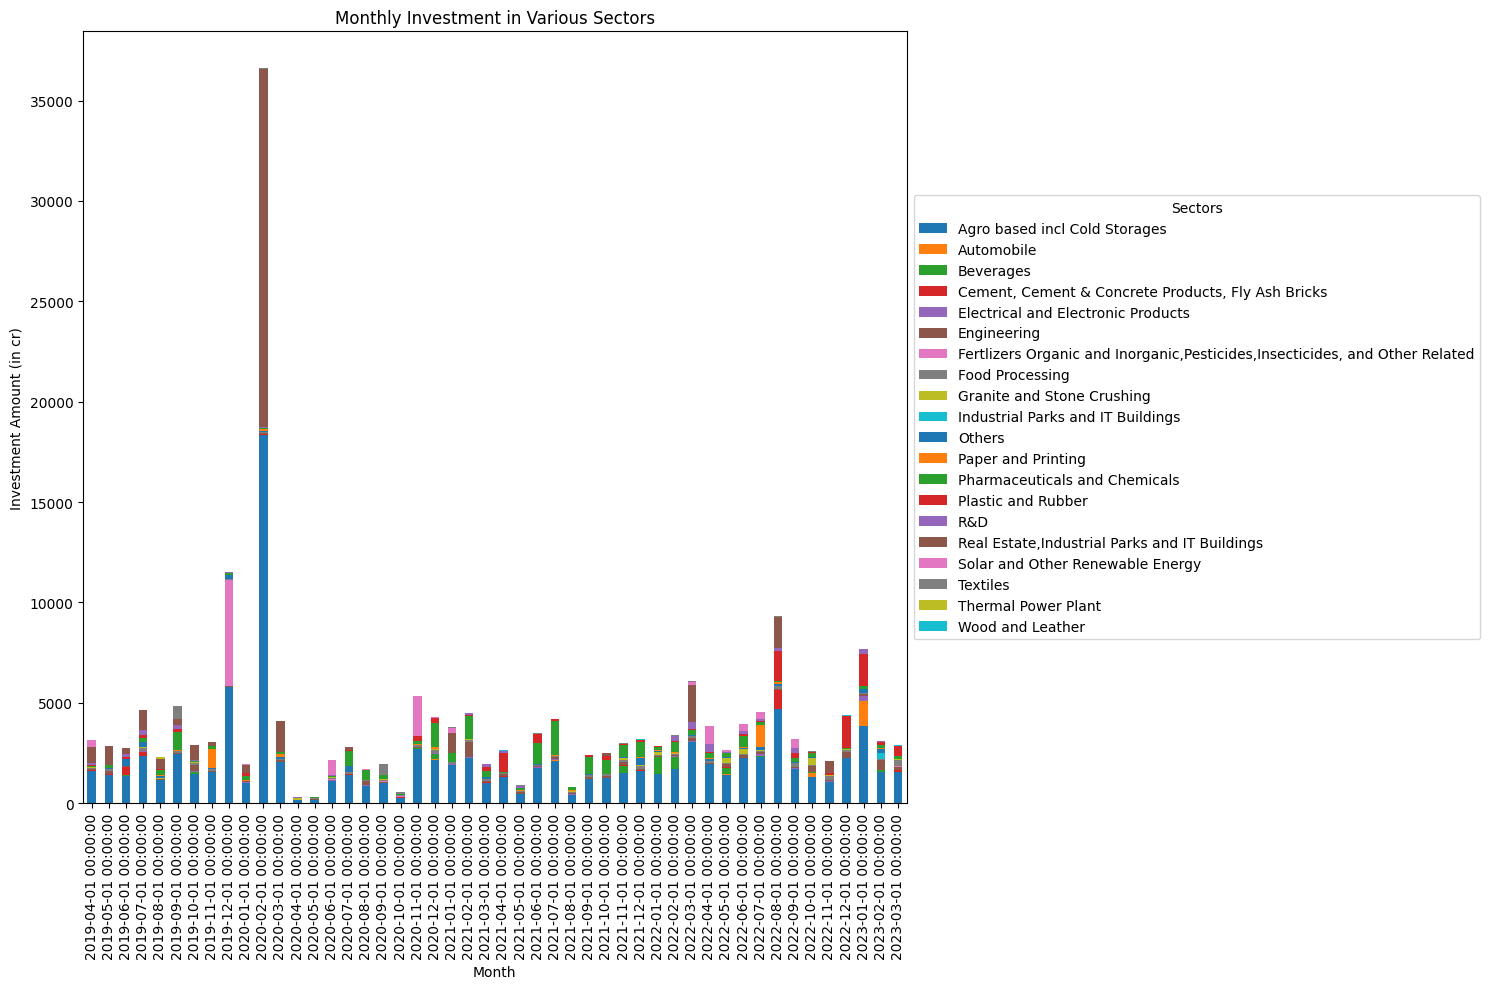

In [11]:
# Plotting the stacked bar graph using Matplotlib
fig, ax = plt.subplots(figsize=(15, 10))

# Stack the bars
pivot_df.set_index('month').plot(kind='bar', stacked=True, ax=ax)

# Formatting the graph
ax.set_title('Monthly Investment in Various Sectors')
ax.set_xlabel('Month')
ax.set_ylabel('Investment Amount (in cr)')
ax.legend(title="Sectors", loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [15]:
# Extract month (ignoring the year) and aggregate data
merged_tsipass_df['month_only'] = merged_tsipass_df['month'].apply(lambda x: pd.to_datetime(x, format='%d-%m-%Y').month)
agg_df = merged_tsipass_df.groupby(['month_only', 'sector'])['investment in cr'].sum().unstack().reset_index()

# Fill NaN values with 0
agg_df.fillna(0, inplace=True)

# Sort the data based on month to ensure it's in order
agg_df.sort_values('month_only', inplace=True)

agg_df.head()


# Convert month numbers back to month names for visualization
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
agg_df['month_name'] = agg_df['month_only'].apply(lambda x: month_names[x-1])

agg_df.head()

sector  month_only  Agro based incl Cold Storages  Automobile  Beverages   
0                1                        80.9157   1254.2690   861.6181  \
1                2                        50.6815      0.0650   687.0995   
2                3                       291.1711      7.2800    14.5745   
3                4                       113.1622      2.2500    18.6310   
4                5                       148.1764     50.9951   344.8748   

sector  Cement, Cement & Concrete Products, Fly Ash Bricks   
0                                                 39.6009   \
1                                                102.1041    
2                                                125.0104    
3                                                 65.6549    
4                                                 59.6921    

sector  Electrical and Electronic Products  Engineering   
0                                 269.3718     192.7845  \
1                                  51.5479    1332.5223   
2                                  59.0803     451.7178   
3                                  41.0230     209.6963   
4                                  42.7414     343.0829   

sector  Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related   
0                                                 11.7605                            \
1                                                 12.3678                             
2                                                 17.9162                             
3                                                  8.0459                             
4                                                  3.7100                             

sector  Food Processing  Granite and Stone Crushing  ...  Paper and Printing   
0              241.8833                    170.6481  ...             75.8704  \
1              282.6780                     83.1171  ...            180.0241   
2              549.3504                     92.9612  ...            242.8706   
3              175.9881                    127.0744  ...             48.1030   
4              285.7882                    253.7298  ...             24.5983   

sector  Pharmaceuticals and Chemicals  Plastic and Rubber       R&D   
0                            936.8535           1803.2376  229.4362  \
1                           1857.4966            272.6974  463.8387   
2                            750.8956            750.8545  478.7316   
3                            294.5644           1093.3738  639.6411   
4                            484.0138             73.9669  152.4386   

sector  Real Estate,Industrial Parks and IT Buildings   
0                                           1397.1700  \
1                                          17843.3508   
2                                           3398.9959   
3                                            822.7016   
4                                            903.3170   

sector  Solar and Other Renewable Energy  Textiles  Thermal Power Plant   
0                               246.8500   63.3234                  0.0  \
1                                 4.3574   56.1646                  0.0   
2                               151.5630   66.2145                  0.0   
3                              1202.9360   15.0758                  0.0   
4                                98.4608   37.8943                  0.0   

sector  Wood and Leather  month_name  
0                22.4013     January  
1                10.1368    February  
2                 5.3034       March  
3                 6.9394       April  
4                 5.0455         May  

[5 rows x 22 columns]

In [22]:
import plotly.graph_objects as go

# Create a stacked bar graph
fig = go.Figure()

# Add a bar for each sector
for sector in agg_df.columns[1:-1]:  # Exclude 'month_only' and 'month_name' from columns
    fig.add_trace(
        go.Bar(
            x=agg_df['month_name'],
            y=agg_df[sector],
            name=sector,
        )
    )

# Update layout
fig.update_layout(
    title="Aggregated Monthly Investment in Various Sectors",
    xaxis_title="Month",
    yaxis_title="Investment Amount (in cr)",
    barmode='stack',
    width=1200,
    height=600,
    
)

fig.show()


In [25]:
import plotly.express as px

# Create a line chart using Plotly Express
fig = px.line(pivot_df, x='month', y=pivot_df.columns[1:], title="Monthly Investment in Various Sectors")

# Update the layout and display the chart
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor="rgb(204, 204, 204)",
        linewidth=2,
        ticks="outside",
        tickfont=dict(family="Arial", size=12, color="rgb(82, 82, 82)")
    ),
    yaxis=dict(
        showline=True,
        zeroline=True,
        showgrid=True,
        showticklabels=True
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20, 
        t=110
    )
)
fig.update_layout(yaxis_title="Investment Amount (in cr)",width=1200, height=600)
fig.show()


In [ ]:
import matplotlib.pyplot as plt

sectors = monthly_investments['sector'].unique()
for sector in sectors:
    sector_data = monthly_investments[monthly_investments['sector'] == sector]
    plt.figure(figsize=(14, 6))
    plt.plot(sector_data['month'], sector_data['investment in cr'], label=sector, marker='o')
    plt.title(f"Investment Trends for {sector}")
    plt.xlabel("Month")
    plt.ylabel("Investment (in cr)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [25]:
df_fact_TS_iPASS['month'] = pd.to_datetime(df_fact_TS_iPASS['month'], format='%d-%m-%Y')
df_dim_date['month'] = pd.to_datetime(df_dim_date['month'], format='%Y-%m-%d')

merged_tsipass_df = pd.merge(df_fact_TS_iPASS, df_dim_date, on='month', how='left')
merged_tsipass_df = pd.merge(merged_tsipass_df, df_dim_districts, on='dist_code', how='left')

merged_tsipass_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  Apr      Q1         2019      Mahabubnagar  
1                   13  Apr      Q1         2019          Adilabad  
2                    8  Apr      Q1         2019  Rajanna Sircilla  
3                   27  Apr      Q1         2019  Rajanna Sircilla  
4                    5  Apr      Q1         2019       Mahabubabad

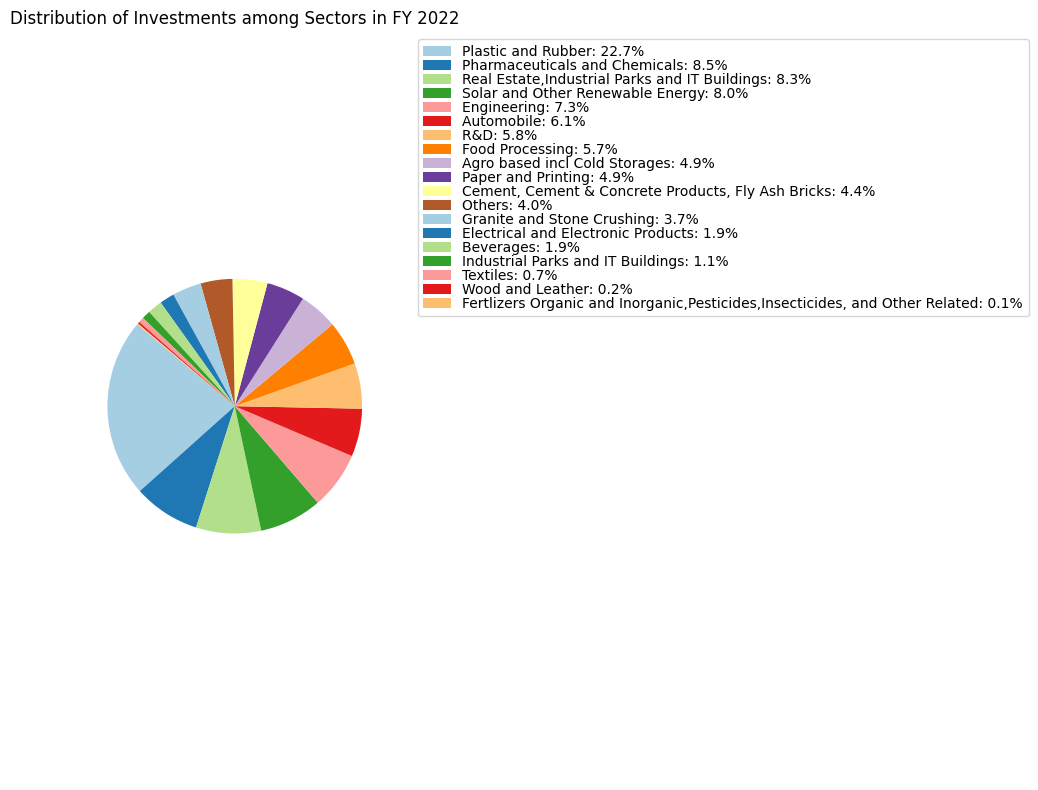

In [26]:
# Filtering for FY 2022
filtered_data = merged_tsipass_df[merged_tsipass_df['fiscal_year'] == 2022]

# Grouping data by sector and calculating total investments
sector_investments = filtered_data.groupby('sector')['investment in cr'].sum()

# Sorting sectors by total investments in descending order
sorted_sectors = sector_investments.sort_values(ascending=False)

# Selecting the top 5 sectors
top_5_sectors = sorted_sectors.head(5)

# Plotting the data
plt.figure(figsize=(10, 8))
# Adjust figsize to make the pie slightly smaller
wedges, texts = plt.pie(sorted_sectors,startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Investments among Sectors in FY 2022')
plt.axis('equal')

# Create a custom legend with sector names and percentages
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(sorted_sectors.index, sorted_sectors / sorted_sectors.sum() * 100)]
legend = plt.legend(wedges, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), labelspacing=0.)
plt.setp(legend.get_title(), fontsize='10')

plt.tight_layout()
plt.show()

## Question 9

In [27]:
merged_tsipass_df.columns

Index(['dist_code', 'month', 'sector', 'investment in cr',
       'number_of_employees', 'Mmm', 'quarter', 'fiscal_year', 'district'],
      dtype='object')

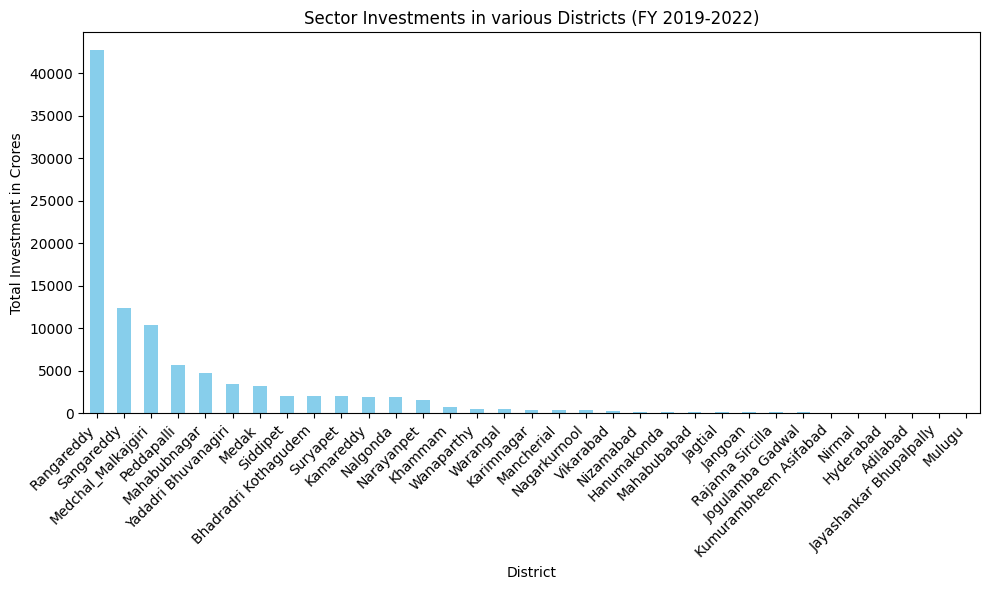

In [28]:
# Filtering for FY 2019 to 2022
filtered_data = merged_tsipass_df[(merged_tsipass_df['fiscal_year'] >= 2019) & (merged_tsipass_df['fiscal_year'] <= 2022)]

# Grouping data by district and calculating total sector investments
district_investments = filtered_data.groupby('district')['investment in cr'].sum()

# Sorting districts by total investments in descending order
sorted_districts = district_investments.sort_values(ascending=False)

# Selecting the top 3 districts
#top_3_districts = sorted_districts.head(3)

# Plotting the data
plt.figure(figsize=(10, 6))
sorted_districts.plot(kind='bar', color='skyblue')
plt.title('Sector Investments in various Districts (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Total Investment in Crores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
demo_df = pd.read_csv("dataset\Demographics.csv")
demo_df['total_pop'] = demo_df['Males']+demo_df['Females']
demo_df.head()

Districts    Males  Females  Sex Ratio (Females per 1000 Males)   Rural  \
0   ADILABAD   356407   352565                                 989  541226   
1  BHADRADRI   532390   536871                                1008  730178   
2  HYDERABAD  2018575  1924748                                 954       0   
3   JAGTIAL    484079   501338                                1036  764081   
4   JANGAON    283648   282728                                 997  495019   

     Urban  Rural Population (%)  Urban Population (%)  Households  total_pop  
0   167746                 76.34                 23.66      156683     708972  
1   339083                 68.29                 31.71      279190    1069261  
2  3943323                  0.00                100.00      849051    3943323  
3   221336                 77.54                 22.46      253619     985417  
4    71357                 87.40                 12.60      139238     566376

In [30]:
population_dict = {
    "Adilabad": 708972,
    "Bhadradri Kothagudem": 1069261,
    "Hyderabad": 3943323,
    "Jagtial": 985417,
    "Jangaon": 566376,
    "Jayashankar Bhupalpalle": 711434,
    "Jogulamba Gadwal": 609990,
    "Kamareddy": 972625,
    "Karimnagar": 1005711,
    "Khammam": 1401639,
    "Kumarambheem Asifabad": 515812,
    "Mahabubabad": 774549,
    "Mahabubnagar": 1486777,
    "Mancherial": 807037,
    "Medak": 767428,
    "Medchal–Malkajgiri": 2440073,
    "Mulugu": 257744,
    "Nagarkurnool": 893308,
    "Narayanpet": 41752,
    "Nalgonda": 1618416,
    "Nirmal": 709418,
    "Nizamabad": 1571022,
    "Peddapalli": 795332,
    "Rajanna Sircilla": 552037,
    "Rangareddy": 2446265,
    "Sangareddy": 1527628,
    "Siddipet": 1012065,
    "Suryapet": 1099560,
    "Vikarabad": 927140,
    "Wanaparthy": 577758,
    "Warangal Rural": 718537,
    "Warangal Urban": 1080858,
    "Yadadri Bhuvanagiri": 739448,
}

{'Adilabad': 0.001248286251079027, 'Bhadradri Kothagudem': 0.0017320373603825446, 'Hyderabad': 0.0003162307525911522, 'Jagtial': 0.0038866794463663606, 'Jogulamba Gadwal': 0.001841013787111264, 'Kamareddy': 0.005070813520113096, 'Karimnagar': 0.010115231910558799, 'Khammam': 0.003963217347690811, 'Mahabubabad': 0.0028584376198277964, 'Mahabubnagar': 0.010824757176092985, 'Mancherial': 0.0025401561514527835, 'Medak': 0.01795868798115263, 'Mulugu': 0.0017769569805698678, 'Nagarkurnool': 0.0025142504041159378, 'Nalgonda': 0.006150458225820802, 'Narayanpet': 0.04953056141023184, 'Nirmal': 0.0021552878556788803, 'Nizamabad': 0.0017740044378754722, 'Peddapalli': 0.0036651360689623955, 'Rajanna Sircilla': 0.010410534076520234, 'Rangareddy': 0.15851021863943604, 'Sangareddy': 0.04863225863888329, 'Siddipet': 0.008936184928833623, 'Suryapet': 0.005023827712903343, 'Vikarabad': 0.00412882628297776, 'Wanaparthy': 0.004150526691105965, 'Yadadri Bhuvanagiri': 0.034930110028020905}


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\1679349509.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', num_districts)


<Figure size 1500x1500 with 0 Axes>

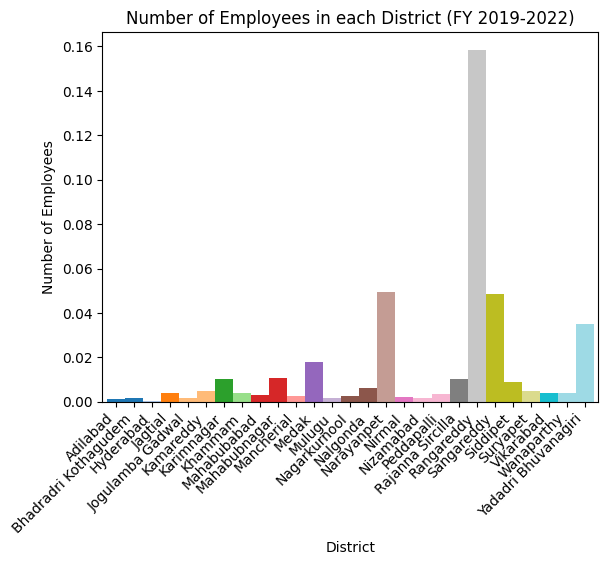

In [31]:
# Filtering for FY 2019 to 2022
filtered_data = merged_tsipass_df[(merged_tsipass_df['fiscal_year'] >= 2019) & (merged_tsipass_df['fiscal_year'] <= 2022)]

# Grouping data by district and calculating total sector investments
district_investments = filtered_data.groupby('district')['number_of_employees'].sum()

ratio_investment = {}
for district in district_investments.index:
    try:
        district_upper = district.upper()
        ratio_investment[district] = district_investments[district]/population_dict[district]
    except:
        pass

# Sorting districts by total investments in descending order
print(ratio_investment)
sorted_districts = pd.DataFrame(list(ratio_investment.items()), columns=["district", "ratio"])

# Selecting the top 3 districts
#top_3_districts = sorted_districts.head(3)

# Plotting the data
plt.figure(figsize=(15,15))

num_districts = len(sorted_districts)

# Choose a colormap
colormap = plt.cm.get_cmap('tab20', num_districts)

ax2 = sorted_districts.plot(kind='bar', x='district', y='ratio', color=colormap(range(num_districts)),legend = False, grid = False, width=1)
plt.title('Number of Employees in each District (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Number of Employees', fontsize = 10)
plt.xticks(rotation=45, ha='right',fontsize=10)
plt.yticks(fontsize=10)
ax2.set_xticklabels(sorted_districts['district'])

plt.show()


In [32]:
significant_dist = ['Hyderabad', 'Rangareddy','Sangareddy','Medchal_Malkajgiri','Yadadri Bhuvanagiri']
val = pd.DataFrame()
new = []
val['district'] = significant_dist
for i in significant_dist:
    new.append(merged_tsipass_df[merged_tsipass_df['district']==i]['investment in cr'].sum())
val['investment'] = new
val

district  investment
0            Hyderabad     55.7956
1           Rangareddy  42706.3320
2           Sangareddy  12366.7556
3   Medchal_Malkajgiri  10394.5610
4  Yadadri Bhuvanagiri   3499.8803

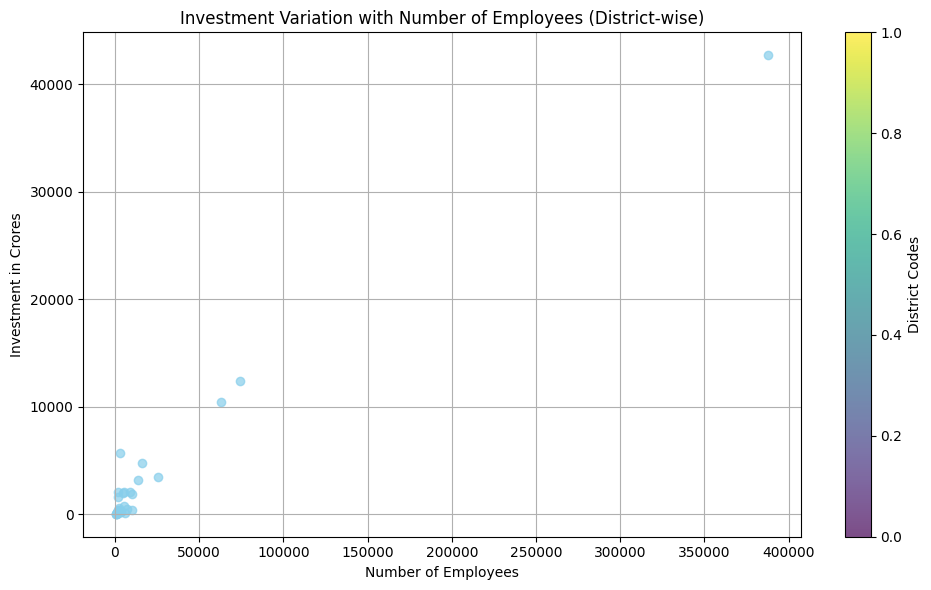

In [33]:
plt.figure(figsize=(10, 6))
aggregated_data = merged_tsipass_df.groupby('district')[['investment in cr', 'number_of_employees']].sum()

plt.scatter(aggregated_data['number_of_employees'], aggregated_data['investment in cr'], color='skyblue', alpha=0.7)
plt.title('Investment Variation with Number of Employees (District-wise)')
plt.xlabel('Number of Employees')
plt.ylabel('Investment in Crores')
plt.colorbar(label='District Codes')
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 10

In [34]:
merged_stamps_df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year revenue_segment  
0         2019    High Revenue  
1         2019  Medium Revenue  
2         2019     Low Revenue  
3         2019     Low Revenue  
4         2019    High Revenue

In [35]:
merged_tsipass_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  Apr      Q1         2019      Mahabubnagar  
1                   13  Apr      Q1         2019          Adilabad  
2                    8  Apr      Q1         2019  Rajanna Sircilla  
3                   27  Apr      Q1         2019  Rajanna Sircilla  
4                    5  Apr      Q1         2019       Mahabubabad

In [36]:
# Merge datasets based on common columns (month and district name)
merged_transport_df['month'] = pd.to_datetime(merged_transport_df['month'], format='%Y-%m')

all_merged_df = pd.merge(merged_stamps_df, merged_transport_df, on=['month', 'district','dist_code'])
all_merged_df = pd.merge(all_merged_df, merged_tsipass_df, on=['month', 'district','fiscal_year','quarter','Mmm','dist_code'])

In [37]:
all_merged_df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      14_1 2019-04-01                      4533                  59236363   
2      17_3 2019-04-01                      4151                  41508762   
3      20_3 2019-04-01                      2116                  23674170   
4      20_3 2019-04-01                      2116                  23674170   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0      Mahabubnagar  Apr      Q1   
2                     0                     0          Siddipet  Apr      Q1   
3                     0                     0  Rajanna Sircilla  Apr      Q1   
4                     0                     0  Rajanna Sircilla  Apr      Q1   

   fiscal_year  ... seatCapacity_4_to_6  seatCapacity_above_6  \
0         2019  ...                 450                    44   
1         2019  ...                 450                    44   
2         2019  ...                 279                    53   
3         2019  ...                 104                     5   
4         2019  ...                 104                     5   

   Brand_new_vehicles  Pre-owned_vehicles  category_Non-Transport  \
0                5104                 106                    4802   
1                5104                 106                    4802   
2                3470                 138                    3353   
3                1751                  41                    1648   
4                1751                  41                    1648   

   category_Transport  TotalVehicles              sector  investment in cr  \
0                 408           5210         Engineering            2.3200   
1                 408           5210  Paper and Printing           14.4000   
2                 255           3608     Food Processing            3.2900   
3                 144           1792    Wood and Leather            0.2000   
4                 144           1792            Textiles            0.2675   

   number_of_employees  
0                   15  
1                  305  
2                   30  
3                    8  
4                   27  

[5 rows x 31 columns]

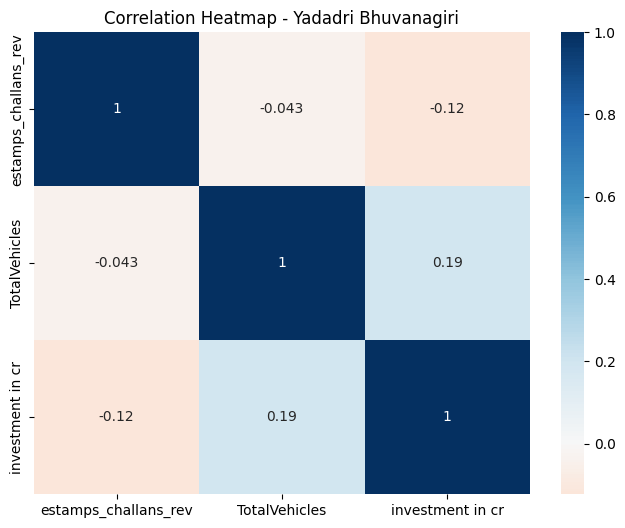

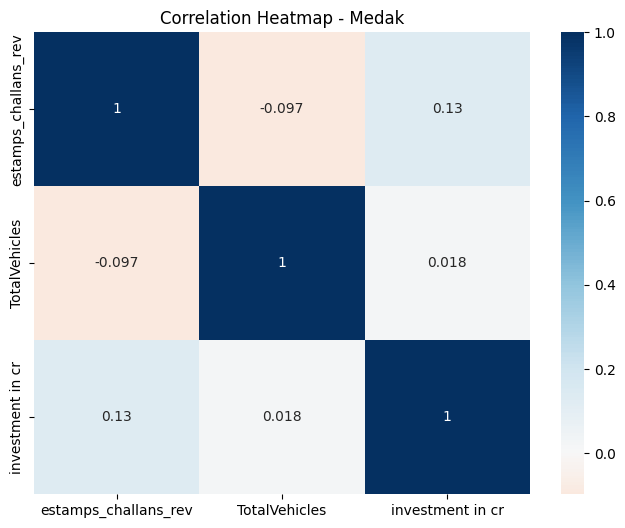

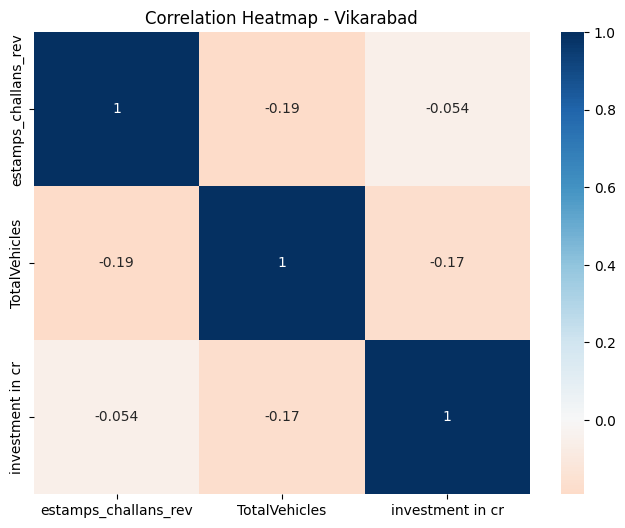

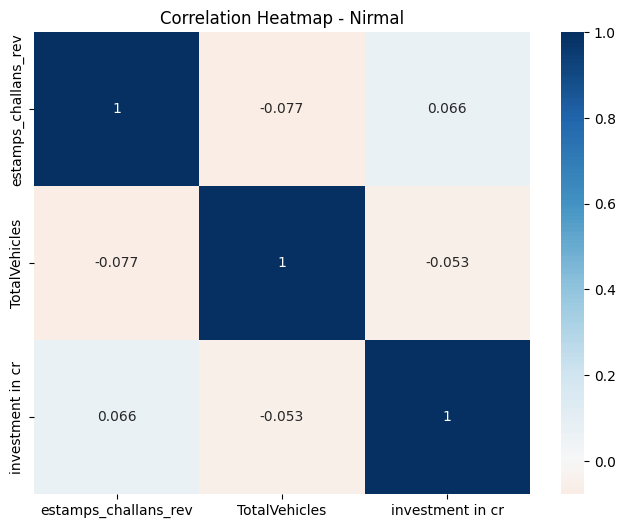

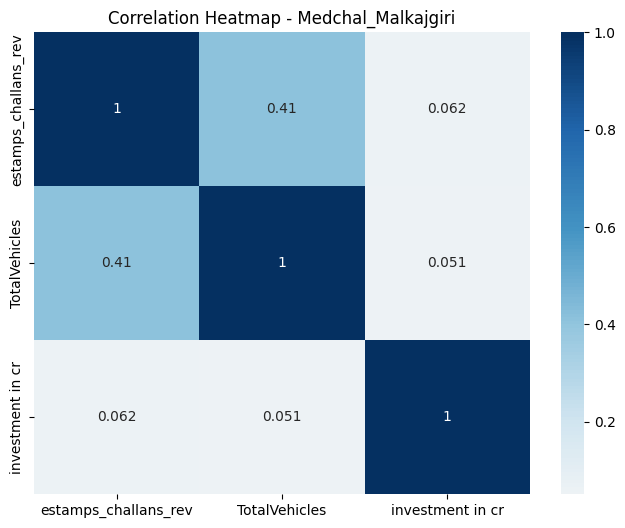

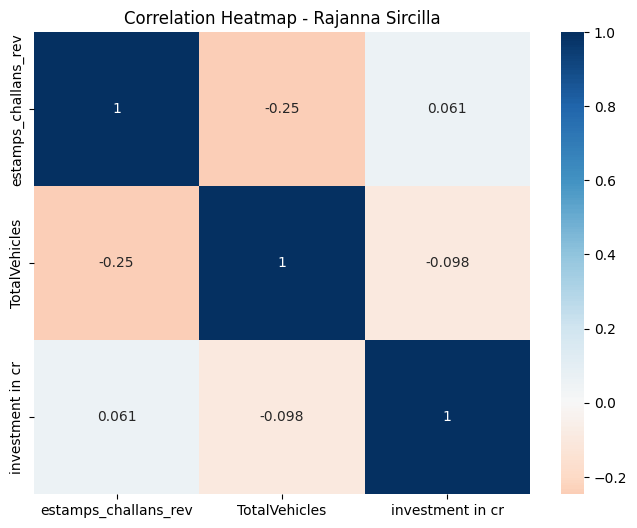

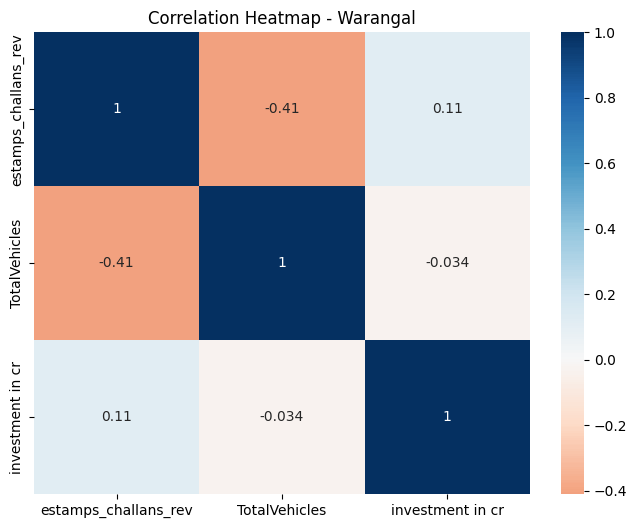

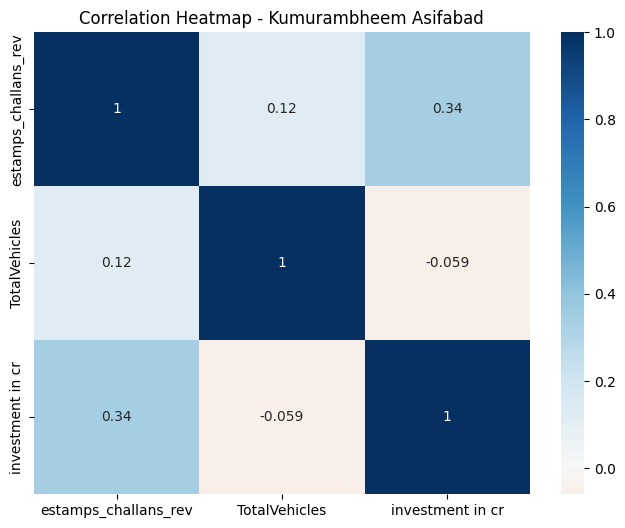

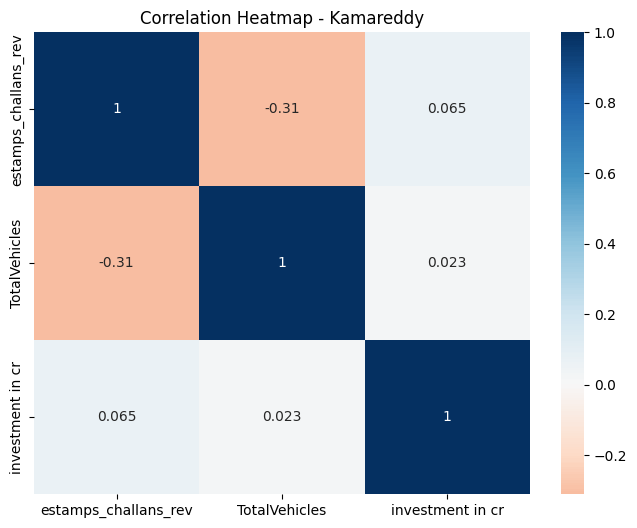

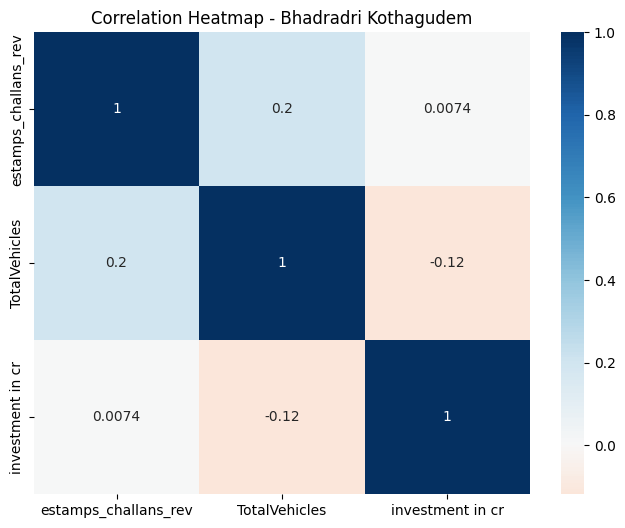

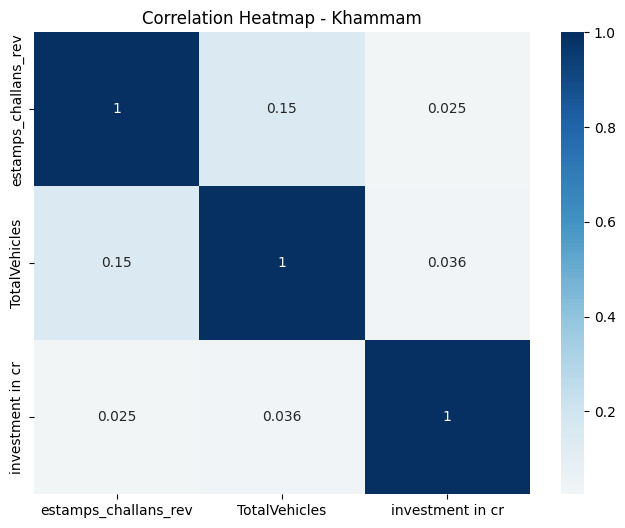

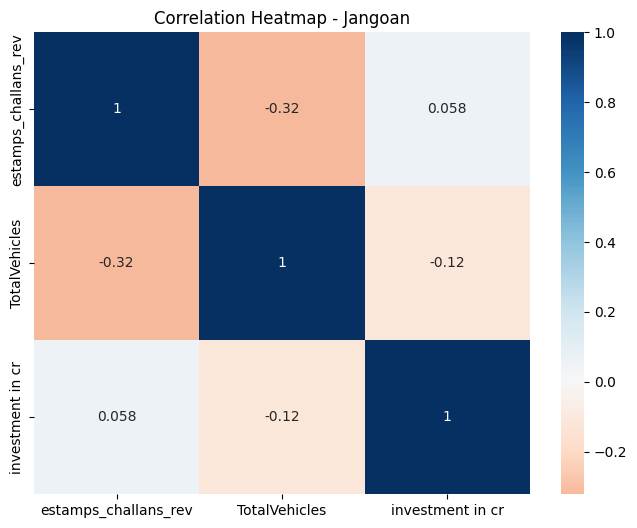

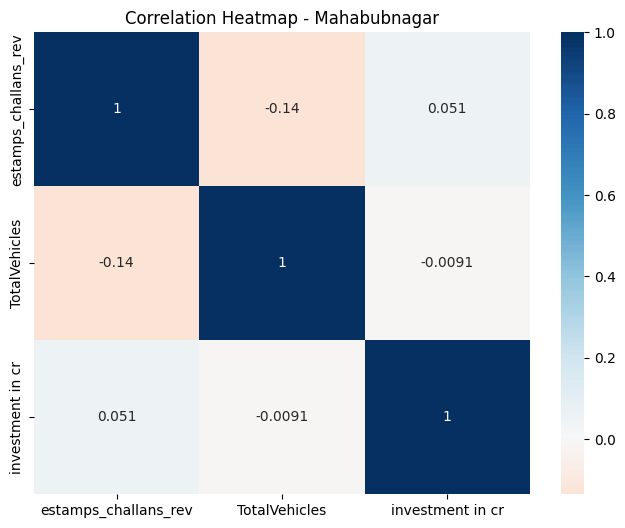

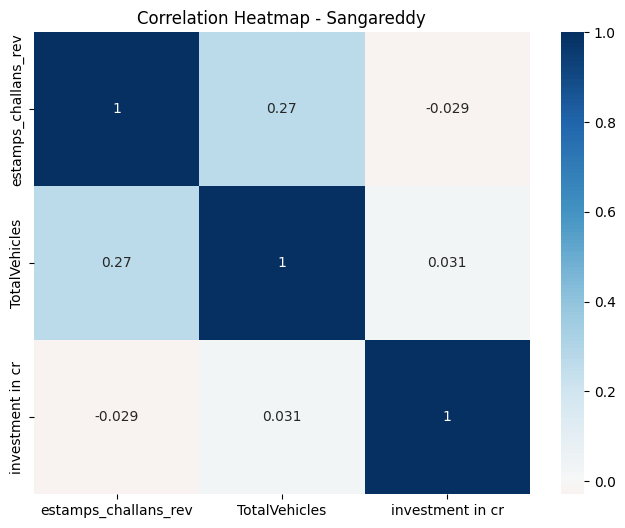

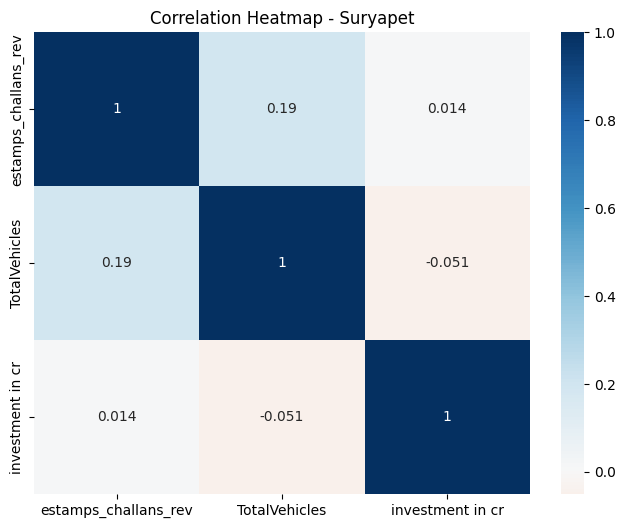

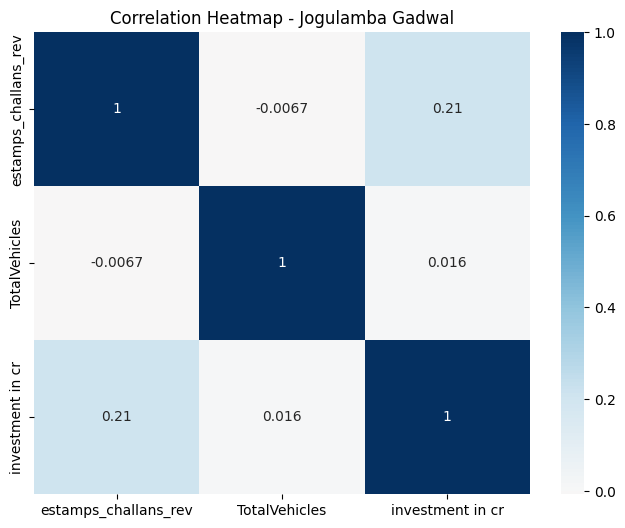

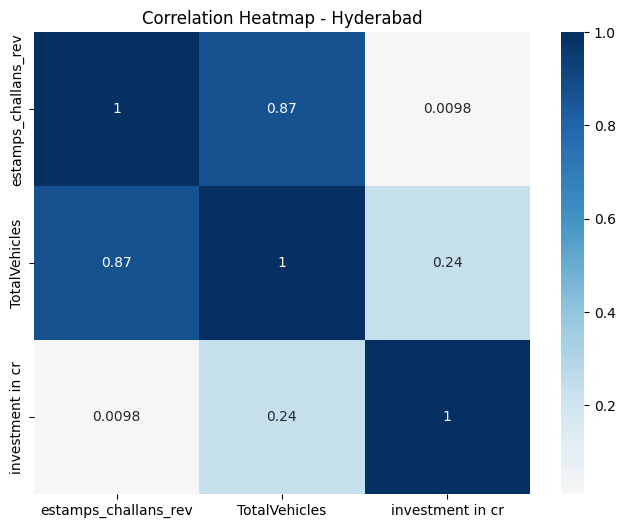

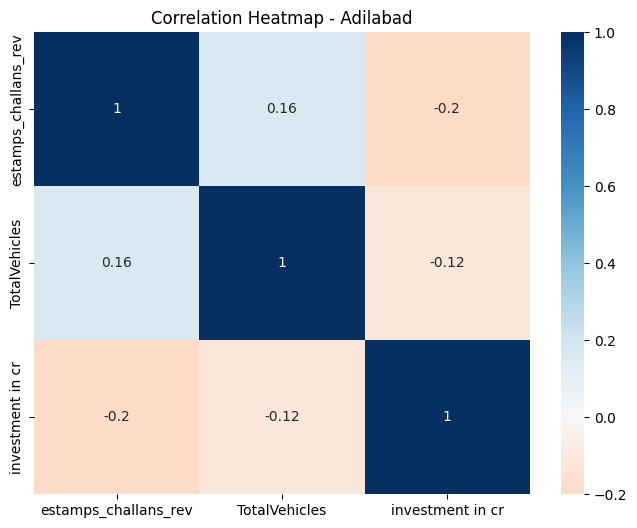

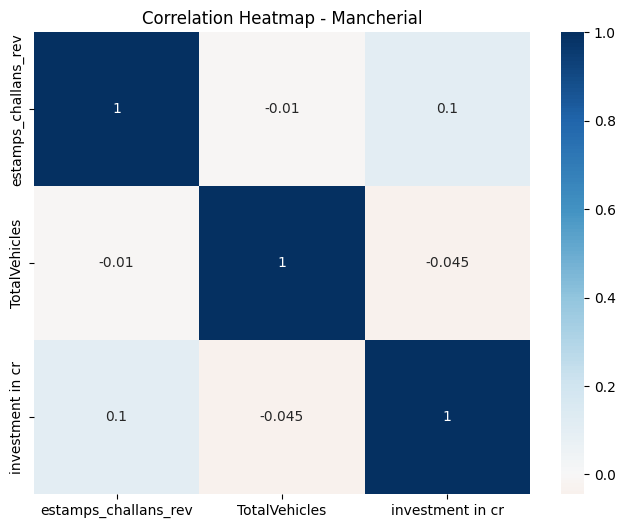

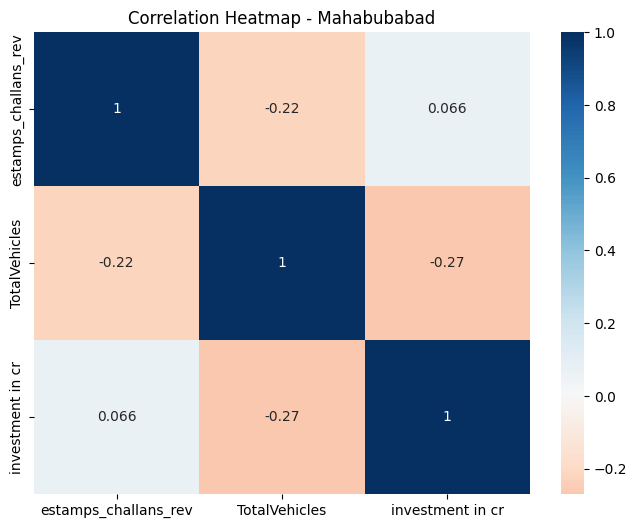

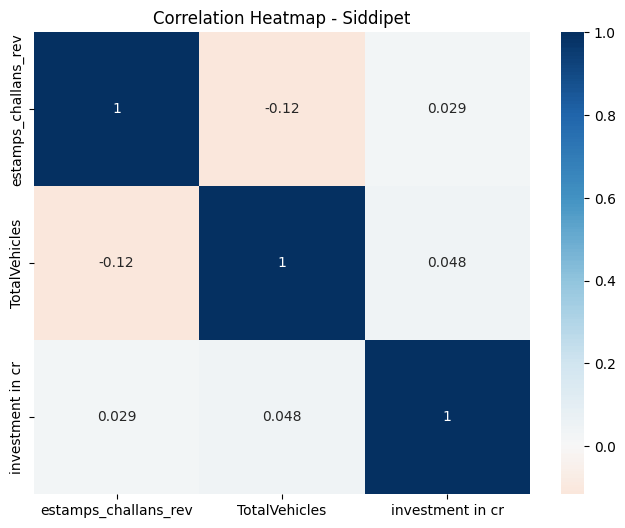

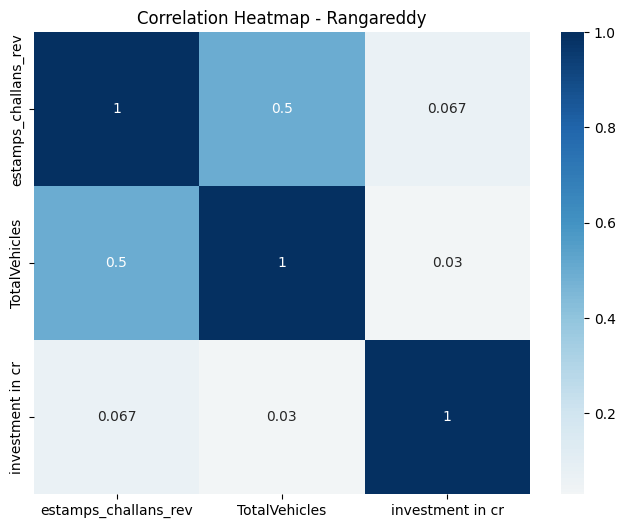

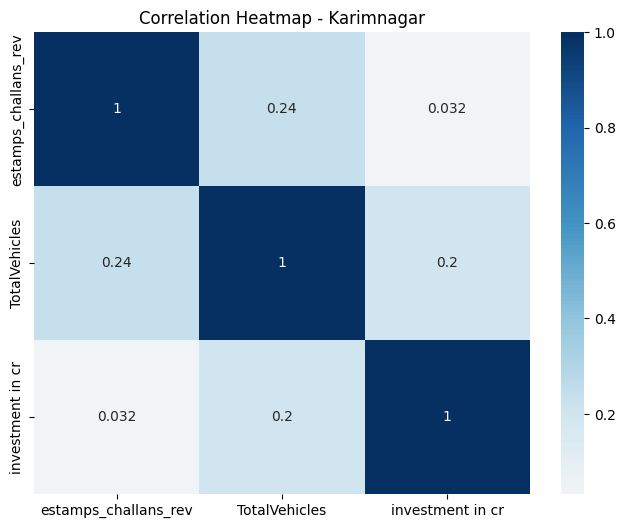

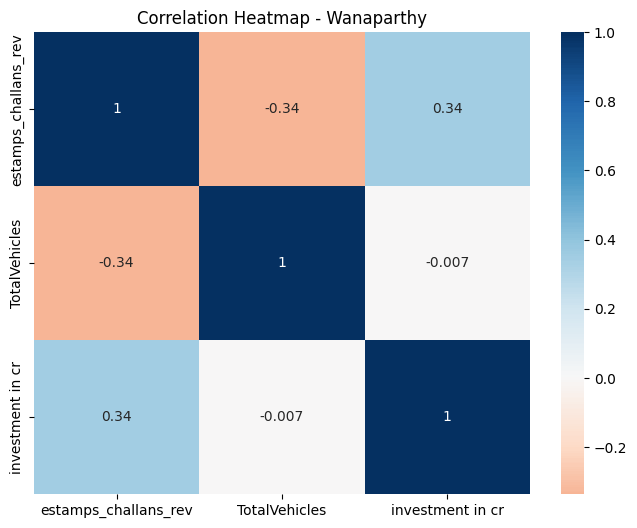

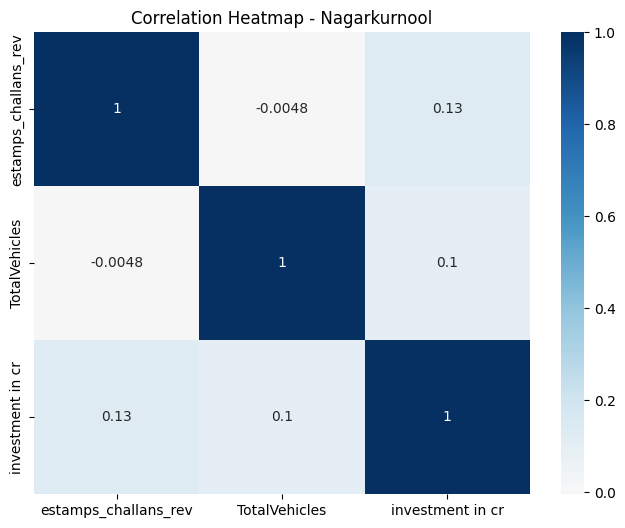

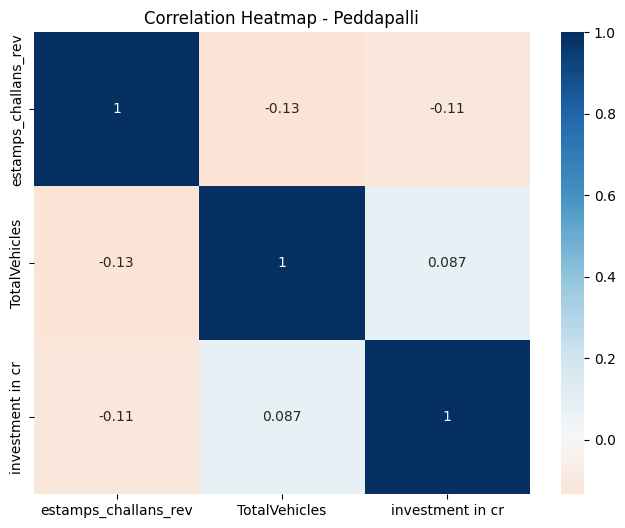

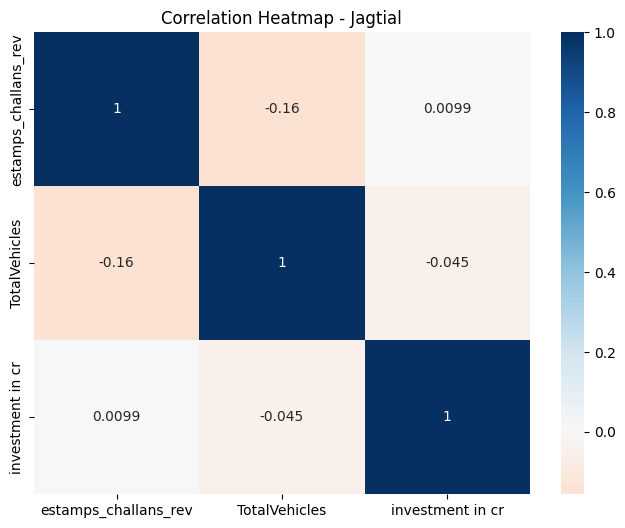

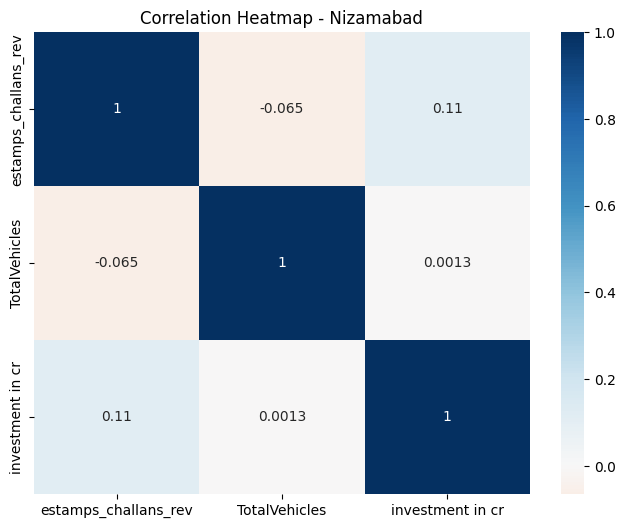

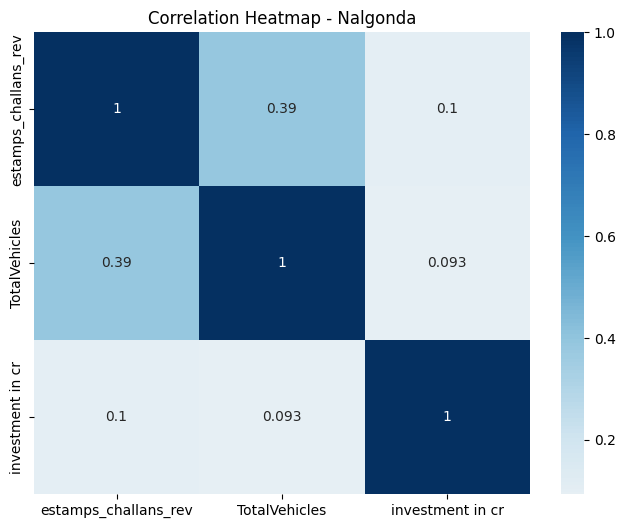

In [41]:
# Filter data for FY 2021 and 2022
filtered_df = all_merged_df[(all_merged_df['fiscal_year'] >= 2021) & (all_merged_df['fiscal_year'] <= 2022)]

# List of unique districts
unique_districts = filtered_df['district'].unique()

# Iterate through each district
for district in unique_districts:
    district_df = filtered_df[filtered_df['district'] == district]
    
    # Calculate correlation matrix
    correlation_matrix = district_df[['estamps_challans_rev', 'TotalVehicles', 'investment in cr']].corr()

    # Create a heatmap for correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, cmap='RdBu', annot=True, center=0)
    plt.title(f'Correlation Heatmap - {district}')
    plt.show()

    # Optionally, you can save each heatmap as an image
    # plt.savefig(f'heatmap_{district}.png')


In [46]:
import pandas as pd

# Filter data for FY 2021 and 2022
filtered_df = all_merged_df[(all_merged_df['fiscal_year'] >= 2021) & (all_merged_df['fiscal_year'] <= 2022)]

# List of unique districts
unique_districts = filtered_df['district'].unique()

# Initialize an empty DataFrame to store correlation values
correlation_df = pd.DataFrame(columns=['District', 'StampVsVehicles', 'StampVsInvestments', 'VehiclesVsInvestments'])

# Iterate through each district
for district in unique_districts:
    district_df = filtered_df[filtered_df['district'] == district]
    
    # Calculate correlation matrix
    correlation_matrix = district_df[['estamps_challans_rev', 'TotalVehicles', 'investment in cr']].corr()
    
    # Extract correlation values
    stamp_vs_vehicles = correlation_matrix.loc['estamps_challans_rev', 'TotalVehicles']
    stamp_vs_investments = correlation_matrix.loc['estamps_challans_rev', 'investment in cr']
    vehicles_vs_investments = correlation_matrix.loc['TotalVehicles', 'investment in cr']
    
    # Append correlation values to the DataFrame
    correlation_df = correlation_df.append({
        'District': district,
        'StampVsVehicles': stamp_vs_vehicles,
        'StampVsInvestments': stamp_vs_investments,
        'VehiclesVsInvestments': vehicles_vs_investments
    }, ignore_index=True)


df = pd.DataFrame(correlation_df)
# Display the correlation DataFrame
correlation_df.to_csv('correlation_values.csv', index=False)


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3393420109.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3393420109.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3393420109.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3393420109.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corre

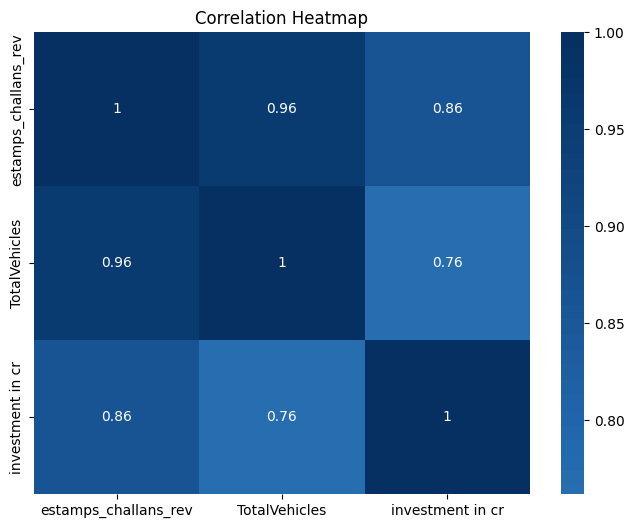

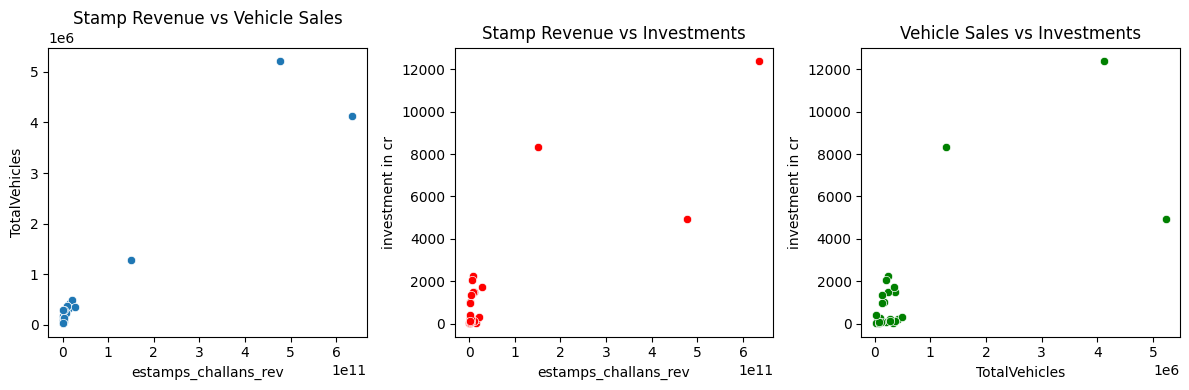

In [39]:
# Filter data for FY 2021 and 2022
filtered_df = all_merged_df[(all_merged_df['fiscal_year'] >= 2021) & (all_merged_df['fiscal_year'] <= 2022)]

# Group data by district name and calculate aggregated measures
grouped_df = filtered_df.groupby('district').agg({
    'estamps_challans_rev': 'sum',
    'TotalVehicles': 'sum',
    'investment in cr': 'sum'
}).reset_index()

# Calculate correlation matrix
correlation_matrix = grouped_df[['estamps_challans_rev', 'TotalVehicles', 'investment in cr']].corr()

# Create a heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='RdBu',annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=grouped_df, x='estamps_challans_rev', y='TotalVehicles')
plt.title('Stamp Revenue vs Vehicle Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(data=grouped_df, x='estamps_challans_rev', y='investment in cr', color = 'red')
plt.title('Stamp Revenue vs Investments')

plt.subplot(1, 3, 3)
sns.scatterplot(data=grouped_df, x='TotalVehicles', y='investment in cr', color = 'green')
plt.title('Vehicle Sales vs Investments')

plt.tight_layout()
plt.show()


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3419036032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['investment'] = filtered_df['investment in cr']*10000000
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3419036032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['std_investment'] = filtered_df['investment in cr']/sum(filtered_df['investment in cr'])
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_15696\3419036032.py:9: Sett

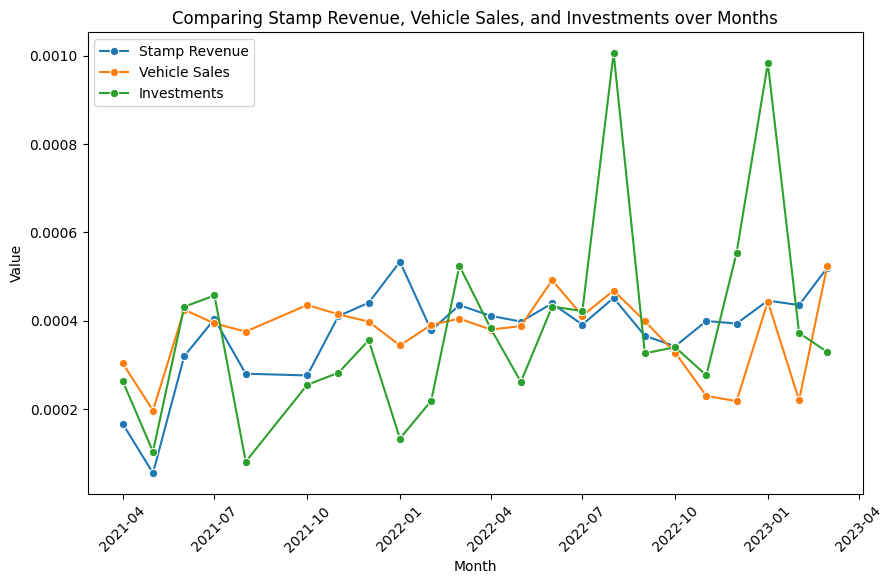

In [49]:
plt.figure(figsize=(10, 6))
filtered_df = all_merged_df[(all_merged_df['fiscal_year'] >= 2021) & (all_merged_df['fiscal_year'] <= 2022)]


filtered_df['investment'] = filtered_df['investment in cr']*10000000

filtered_df['std_investment'] = filtered_df['investment in cr']/sum(filtered_df['investment in cr'])

filtered_df['std_estamps_challans_rev'] = filtered_df['estamps_challans_rev']/sum(filtered_df['estamps_challans_rev'])

filtered_df['std_TotalVehicles'] = filtered_df['TotalVehicles']/sum(filtered_df['TotalVehicles'])

# Line plot for Stamp Revenue over months
sns.lineplot(data=filtered_df, x='month', y='std_estamps_challans_rev', label='Stamp Revenue',ci=None,marker='o')

# Line plot for Vehicle Sales over months
sns.lineplot(data=filtered_df, x='month', y='std_TotalVehicles', label='Vehicle Sales',ci=None,marker='o')

# Line plot for Investments over months
sns.lineplot(data=filtered_df, x='month', y='std_investment', label='Investments',ci=None,marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Comparing Stamp Revenue, Vehicle Sales, and Investments over Months')
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Display the plot
plt.show()


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14684\3651036846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['investment'] = filtered_df['investment in cr'] * 10000000


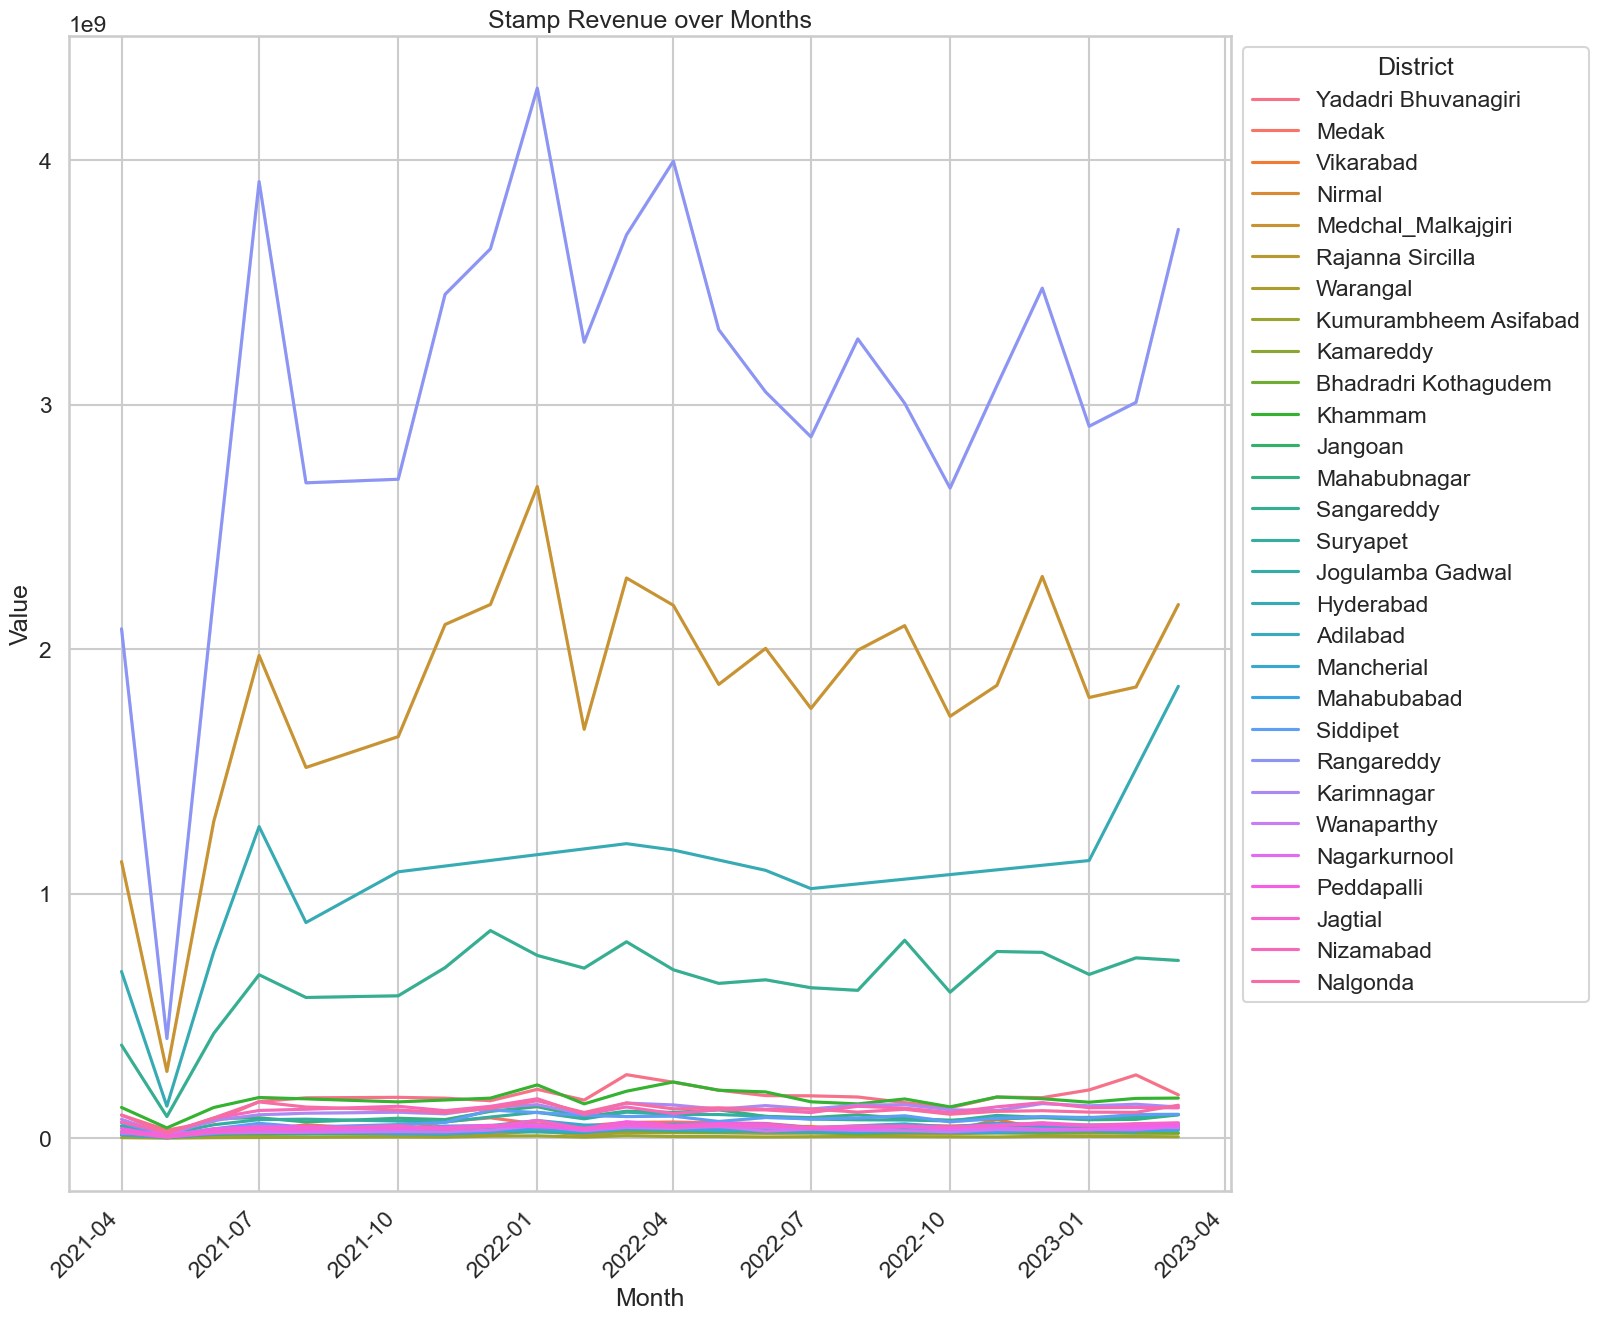

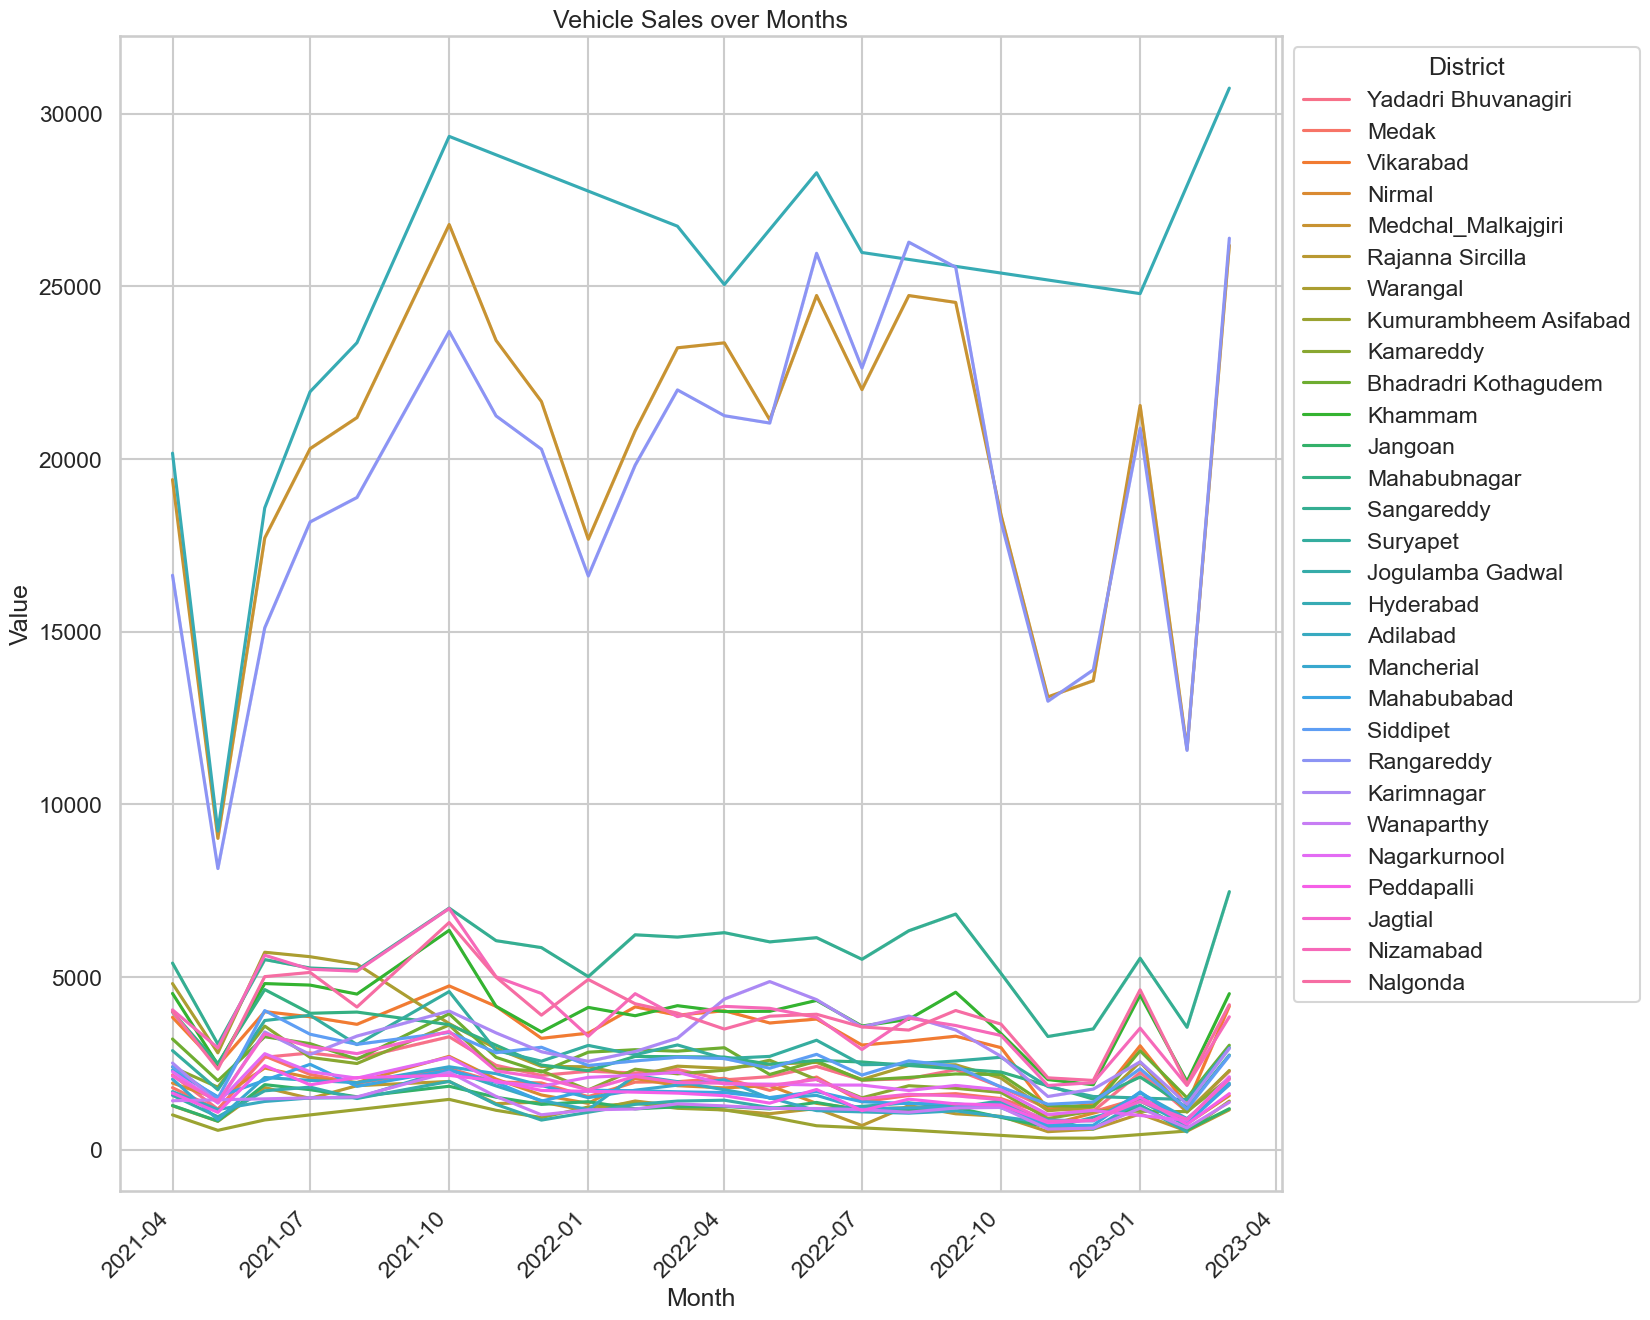

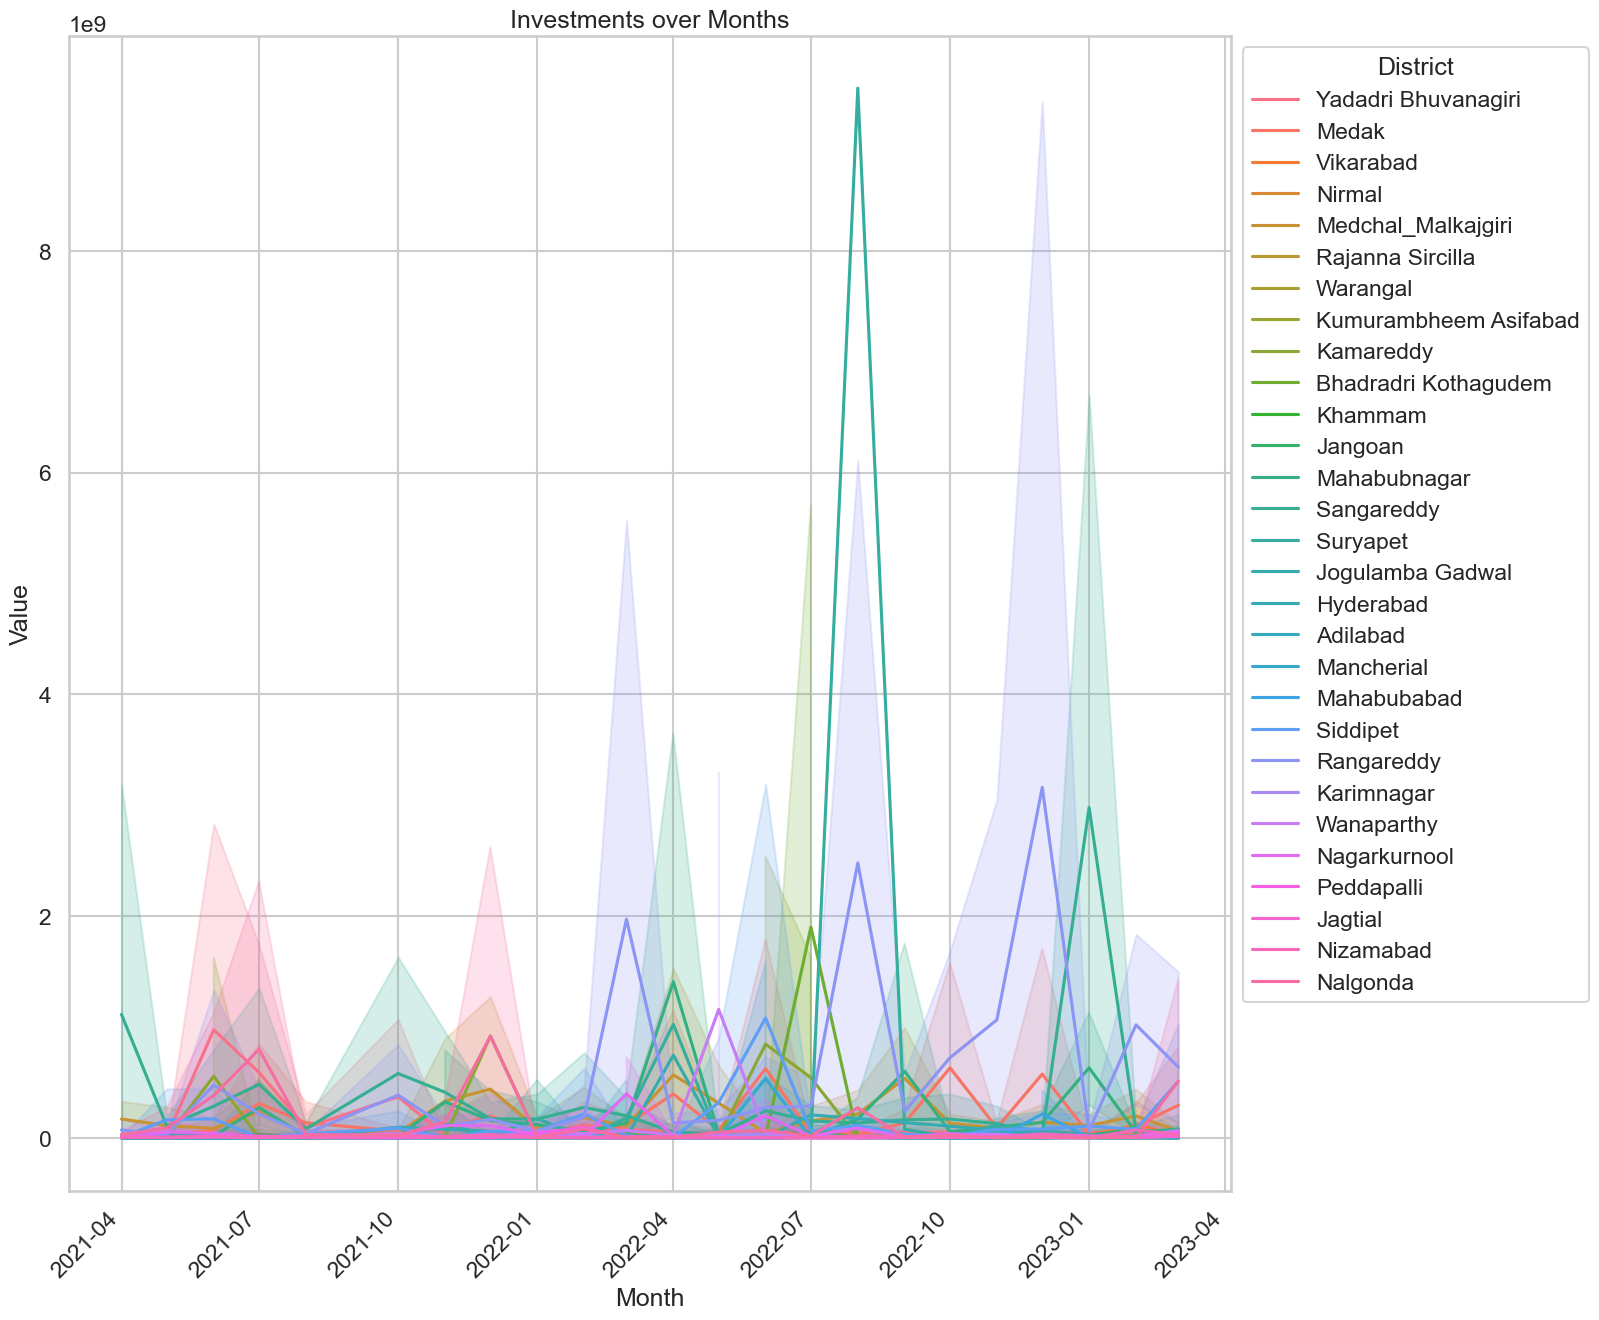

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(15, 15))


filtered_df['investment'] = filtered_df['investment in cr'] * 10000000

# Create a separate line plot for each district

# Line plot for Stamp Revenue over months
sns.lineplot(data=filtered_df, x='month', y='estamps_challans_rev', hue='district', legend='full')
plt.title('Stamp Revenue over Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha ='right')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location and position

# Display the plot
plt.show()
sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(15, 15))

# Line plot for Vehicle Sales over months
sns.lineplot(data=filtered_df, x='month', y='TotalVehicles', hue='district', legend='full')
plt.title('Vehicle Sales over Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45,ha ='right')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location and position

# Display the plot
plt.show()


sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(15, 15))

# Line plot for Investments over months
sns.lineplot(data=filtered_df, x='month', y='investment', hue='district', legend='full')
plt.title('Investments over Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45,ha ='right')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location and position

# Display the plot
plt.show()


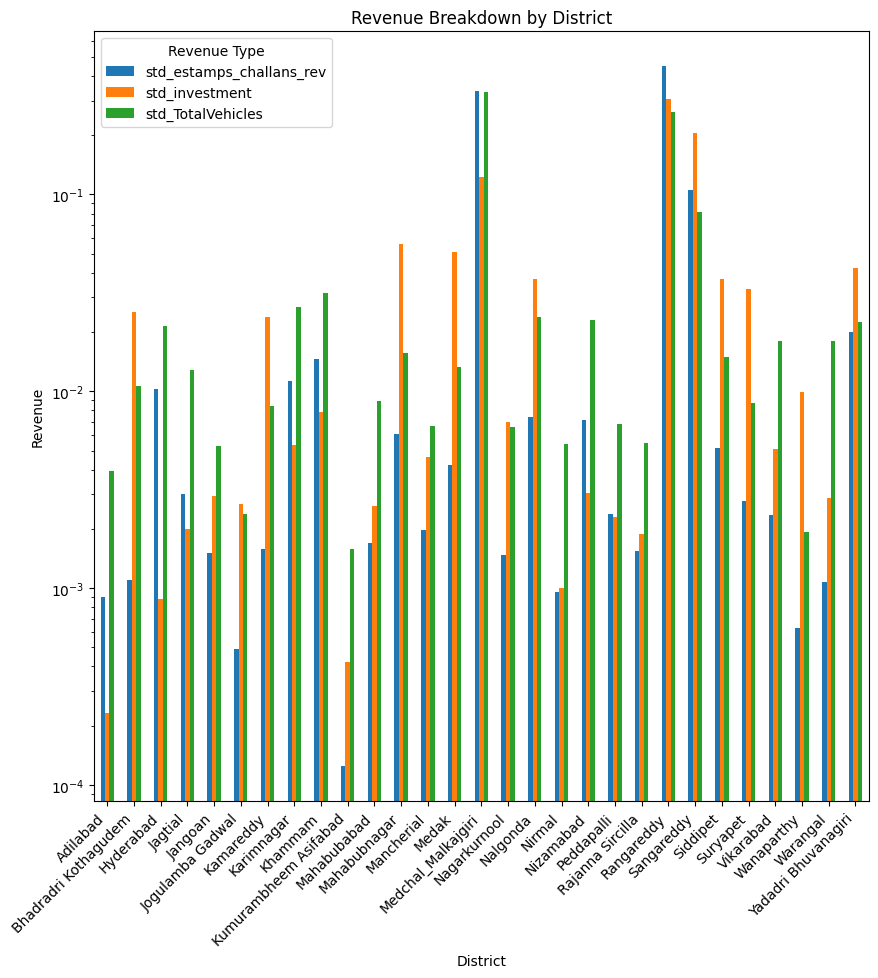

In [50]:
filtered_df2 = filtered_df[['district', 'std_estamps_challans_rev', 'std_investment', 'std_TotalVehicles']]
grouped_df = filtered_df2.groupby('district').sum()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(10, 10))
plt.title('Revenue Breakdown by District')
plt.xlabel('District')
plt.ylabel('Revenue')
plt.legend(title='Revenue Type')
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xticks(rotation=45, ha='right', fontsize =10)
ax.grid(False)

plt.show()

## Question 11

In [43]:
merged_tsipass_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  Apr      Q1         2019      Mahabubnagar  
1                   13  Apr      Q1         2019          Adilabad  
2                    8  Apr      Q1         2019  Rajanna Sircilla  
3                   27  Apr      Q1         2019  Rajanna Sircilla  
4                    5  Apr      Q1         2019       Mahabubabad

In [44]:
# Filter data for FY 2021 and 2022
filtered_tsipass_df = merged_tsipass_df[(merged_tsipass_df['fiscal_year'] >= 2021) & (merged_tsipass_df['fiscal_year'] <= 2022)]

filtered_tsipass_df['investment'] = filtered_tsipass_df['investment in cr'] * 10000000
# Group data by sector and district, calculate sum of investments
grouped_tsipass_df = filtered_tsipass_df.groupby(['sector', 'district'])['investment'].sum().reset_index()

# Pivot the data to have sectors as columns and districts as rows
pivot_df = grouped_tsipass_df.pivot_table(index='district', columns='sector', values='investment', fill_value=0)



C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14684\1390906502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tsipass_df['investment'] = filtered_tsipass_df['investment in cr'] * 10000000


In [45]:
(pivot_df > threshold).sum().mean()

20.105263157894736

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14684\2654272560.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=substantial_pivot_df, orient='h', ci=None)


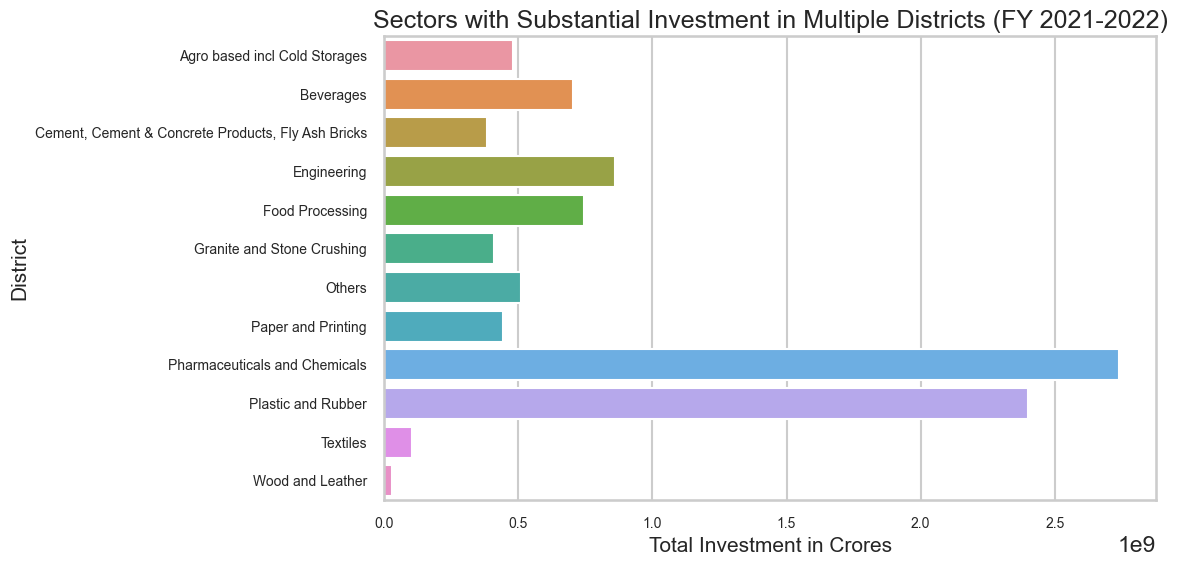

In [46]:
# Find sectors with substantial investment in multiple districts
substantial_sectors = pivot_df.columns[(pivot_df > threshold).sum() >= 20]

# Filter the pivot table for substantial sectors
substantial_pivot_df = pivot_df[substantial_sectors]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=substantial_pivot_df, orient='h', ci=None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Total Investment in Crores', fontsize=15)
plt.ylabel('District', fontsize=15)
plt.title('Sectors with Substantial Investment in Multiple Districts (FY 2021-2022)')
plt.tight_layout()
plt.show()

## Question 12

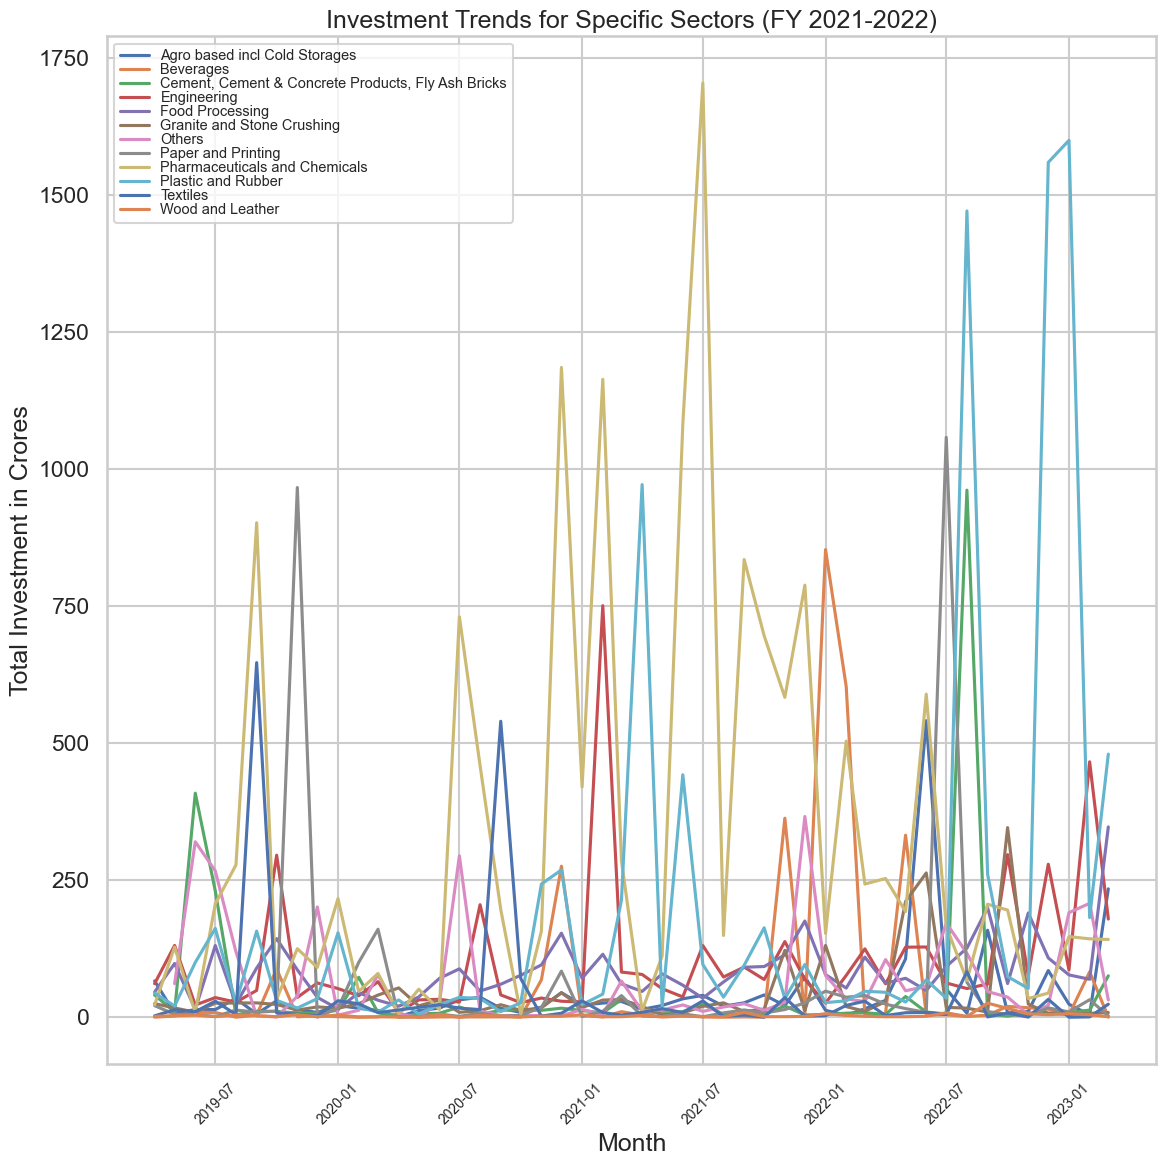

In [47]:
substantial_sectors = substantial_pivot_df.columns
filtered_investment_df = merged_tsipass_df[merged_tsipass_df['sector'].isin(substantial_sectors)]

grouped_investment_df = filtered_investment_df.groupby(['sector', 'month'])['investment in cr'].sum().reset_index()

# Create a line plot for each sector
plt.figure(figsize=(12, 12))


for sector in grouped_investment_df['sector'].unique():
    sector_data = grouped_investment_df[grouped_investment_df['sector'] == sector]
    sns.lineplot(data=sector_data, x='month', y='investment in cr', label=sector)

plt.xlabel('Month')
plt.ylabel('Total Investment in Crores')
plt.title('Investment Trends for Specific Sectors (FY 2021-2022)')
plt.xticks(rotation=45,fontsize =10)
plt.legend(loc='upper left',labelspacing=0., fontsize='xx-small')  # Adjust legend location and position
plt.tight_layout()
plt.show()

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14684\1712656605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_data['month_year'] = pd.to_datetime(sector_data['month']).dt.to_period('M')
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14684\1712656605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_data['month_year'] = pd.to_datetime(sector_data['month']).dt.to_period('M')
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_14684\1712656605.py:17: Setti

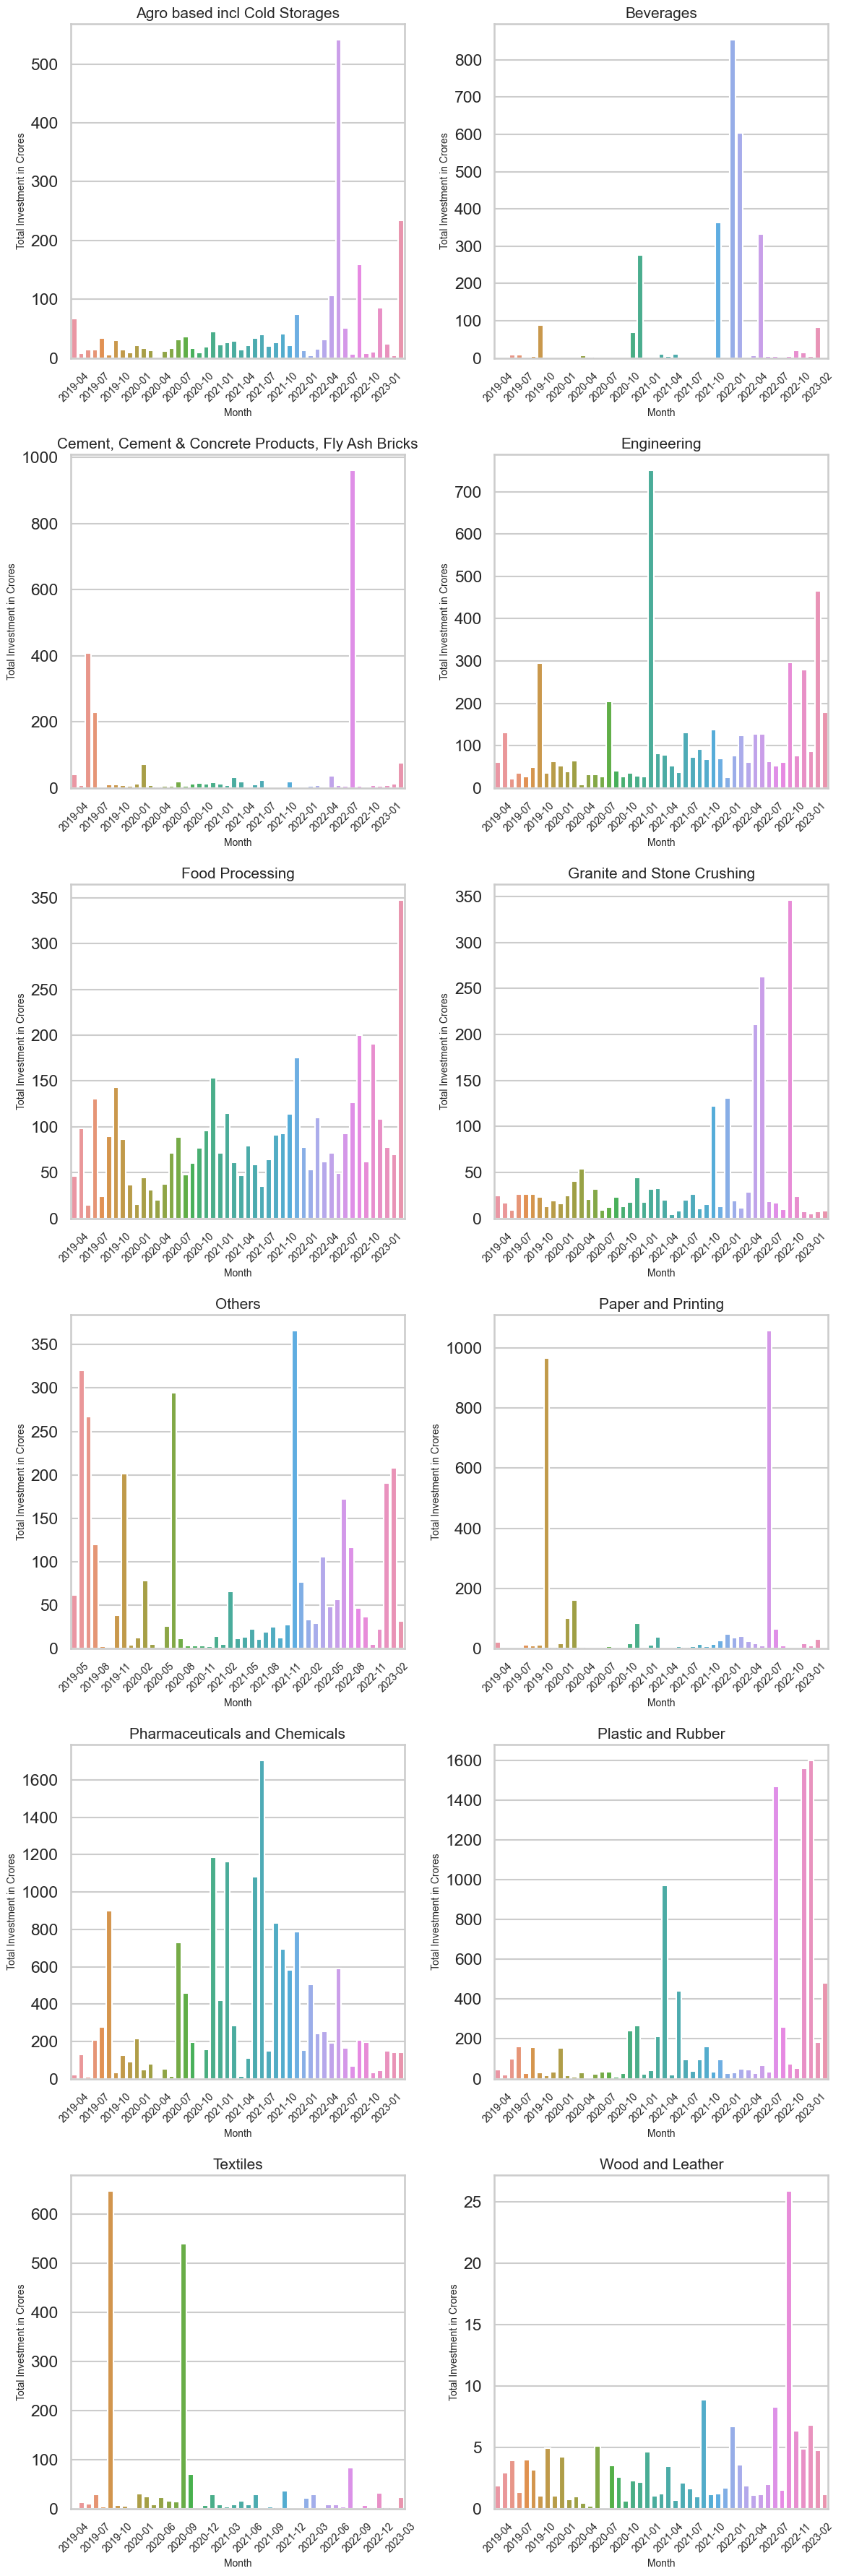

In [49]:
unique_sectors = grouped_investment_df['sector'].unique()

# Calculate the number of rows and columns for subplots
num_rows = (len(unique_sectors) + 1) // 2  # Adjust as needed
num_cols = 2  # You can change this to display more columns per row if desired

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate through each sector and create a subplot
# Inside the loop for creating subplots
for idx, sector in enumerate(unique_sectors):
    ax = axes[idx]
    
    sector_data = grouped_investment_df[grouped_investment_df['sector'] == sector]
    sector_data['month_year'] = pd.to_datetime(sector_data['month']).dt.to_period('M')

    sns.barplot(data=sector_data, x='month_year', y='investment in cr', ax=ax)

    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Total Investment in Crores', fontsize=10)
    ax.set_title(sector, fontsize=15)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    
    # Adjust x-axis tick labels frequency
    xlabels = [item.get_text() for item in ax.get_xticklabels()]
    new_xlabels = [label if idx % 3 == 0 else '' for idx, label in enumerate(xlabels)]
    ax.set_xticklabels(new_xlabels)
    
# Rest of the code remains the same

    
# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import geopandas as gpd
import folium
from collections import defaultdict
import random
from jinja2 import Template  # Import the Jinja2 Template class


# Load GeoJSON data using GeoPandas
json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)


# Create a defaultdict to store the highest investment amount for each district's sector
district_sector_investment = defaultdict(lambda: defaultdict(int))
for district, sector, investment in zip(merged_tsipass_df['district'], merged_tsipass_df['sector'], merged_tsipass_df['investment']):
    district_sector_investment[district][sector] = max(district_sector_investment[district][sector], investment)


sectors = list(set(merged_tsipass_df['sector']))
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'brown', 'gray', 'cyan', 'magenta', 'lime', 'indigo', 'teal', 'violet', 'olive', 'navy', 'maroon', 'silver', 'aqua']

# Create a dictionary to map sectors to colors
sector_colors = dict(zip(sectors, color_palette))

def style_function(feature):
    district = feature['properties']['New_Distri']
    sector = max(district_sector_investment[district], key=district_sector_investment[district].get)
    color = sector_colors[sector]
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1.5,
        'dashArray': '5, 5',
        'fillOpacity': 0.6
    }

# Set the CRS for the GeoDataFrame
gdf.crs = 'EPSG:4326'

# Create a Folium map centered around the data
center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10,tiles=None)

# Add GeoJSON data with style and tooltip
folium.GeoJson(gdf, style_function=style_function, tooltip=folium.GeoJsonTooltip(fields=['New_Distri'], aliases=['District'])).add_to(m)
legend_html_template = """
<div style="position: fixed; bottom: 20px; left: 20px; z-index: 1000; border: 1px solid black;">
  <h4 style="font-size: 12px; margin: 0; padding: 3px;">Legend</h4>
  <ul style="list-style-type: none; padding-left: 0; margin: 0;">
    {% for sector, color in sector_colors.items() %}
      <li style="font-size: 10px; margin-bottom: 2px; padding-left: 3px;"><span style="color: {{ color }};">&#9632;</span> {{ sector }}</li>
    {% endfor %}
  </ul>
</div>
"""
legend_html = Template(legend_html_template).render(sector_colors=sector_colors)  # Render the template with Jinja2

m.get_root().html.add_child(folium.Element(legend_html))  # Add the rendered HTML to the map


# Add district labels
for index, row in gdf.iterrows():
    district_name = row['New_Distri']
    district_center = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    # Create a custom icon to display district name as text
    icon = folium.DivIcon(html=f'<div style="font-size: 10px;">{district_name}</div>')
    folium.Marker(location=district_center, icon=icon).add_to(m)

# Save the map as an HTML file
output_map_path = 'output_map3.html'
m.save(output_map_path)

# Display the map (if using a Jupyter Notebook)
display(m)


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\608362967.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\608362967.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()
